# **Student Performance Indicator**

### Life cycle of Machine Learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform 
- Exploratory Data Analysis
- Data Pre-Processing
- Model Training
- Model Selection

### 1) Problem Statement

- This Project understands hwo the student's performance (test score) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course

### 2) Data Collection

- Data Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

#### 2.1) Import Data and Required Packages.

- Importing Pandas, Numpy, Matplotlib, Seaborn and Warning Library

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV data as Pandas Dataframe

In [65]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [66]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [67]:
print(f"The dataset contains: {df.shape[0]} rows.")
print(f"The dataset contains: {df.shape[1]} columns.")

The dataset contains: 1000 rows.
The dataset contains: 8 columns.


#### 2.2) Dataset Imformation

- gender : sex of students -> (Males/Female)
- race/ethnicity : ethnicity of students -> (Group A, B, C, D, E)
- parental level of education : parents' final education -> (bachelor's degree, some college, master's degree, associate's degree, high school)
- lunch : having lunch before test (standard or free/reduced)
- math score
- reading score
- writing score

### 3) Data Checks to perform

- Check Missing Values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### 3.1) Check Missing Values

In [68]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the dataset

#### 3.2) Check Duplicates

In [69]:
df.duplicated().sum()

0

#### There are no duplicates values in the dataset

#### 3.3) Check data types

In [70]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Check the number of unique values of each column

In [71]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5) Check statistics of data set

In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


#### Insights

- From above description of numerical data, all means are very close to each other - between 66 and 68;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for maths, for writing minimum is much higher - 10 and for reading much higher - 17

#### 3.7) Exploring Data

In [73]:
print("Categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())
print("-"*100)
print("Categories in 'race_ethnicity' variable: ", end=" ")
print(df['race_ethnicity'].unique())
print("-"*100)
print("Categories in 'parental_level_of_education' variable: ", end=" ")
print(df['parental_level_of_education'].unique())
print("-"*100)
print("Categories in 'lunch' variable: ", end=" ")
print(df['lunch'].unique())
print("-"*100)
print("Categories in 'test_preparation_course' variable: ", end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']
----------------------------------------------------------------------------------------------------
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
----------------------------------------------------------------------------------------------------
Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
----------------------------------------------------------------------------------------------------
Categories in 'lunch' variable:  ['standard' 'free/reduced']
----------------------------------------------------------------------------------------------------
Categories in 'test_preparation_course' variable:  ['none' 'completed']


In [74]:
# Define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

## print columns
print("we have {} numerical features: {}".format(len(numeric_features),  numeric_features))
print("\nwe have {} categorical features: {}".format(len(numeric_features), categorical_features))

we have 3 numerical features: ['math_score', 'reading_score', 'writing_score']

we have 3 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### 3.8) Adding columns for "Total Score" and "Average"

In [75]:
df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["Average"] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [76]:
reading_full = df[df["reading_score"] == 100]['Average'].count()
writing_full = df[df["writing_score"] == 100]['Average'].count()
math_full = df[df["math_score"] == 100]['Average'].count()

print(f"Number of students with full marks in maths: {math_full}")
print(f"Number of students with full marks in writing: {writing_full}")
print(f"Number of students with full marks in reading: {reading_full}")

Number of students with full marks in maths: 7
Number of students with full marks in writing: 14
Number of students with full marks in reading: 17


In [77]:
math_less_20 = df[df["math_score"] <= 20]['Average'].count()
writing_less_20 = df[df["writing_score"] <= 20]['Average'].count()
reading_less_20 = df[df["reading_score"] <= 20]['Average'].count()

print(f"NUmber of students with less than 20 marks in maths: {math_less_20}")
print(f"NUmber of students with less than 20 marks in writing: {writing_less_20}")
print(f"NUmber of students with less than 20 marks in reading: {reading_less_20}")

NUmber of students with less than 20 marks in maths: 4
NUmber of students with less than 20 marks in writing: 3
NUmber of students with less than 20 marks in reading: 1


##### Insights

- From above values we get students have performed the worst in Maths
- Best Performance is in reading section

### 4. Exploring Data (Visualization)

#### 4.1) Visualize average score distribution to make some conclusion

- Histogram
- Kernel density Estimation (KDE)

##### 4.1.1) Histogram & KDE

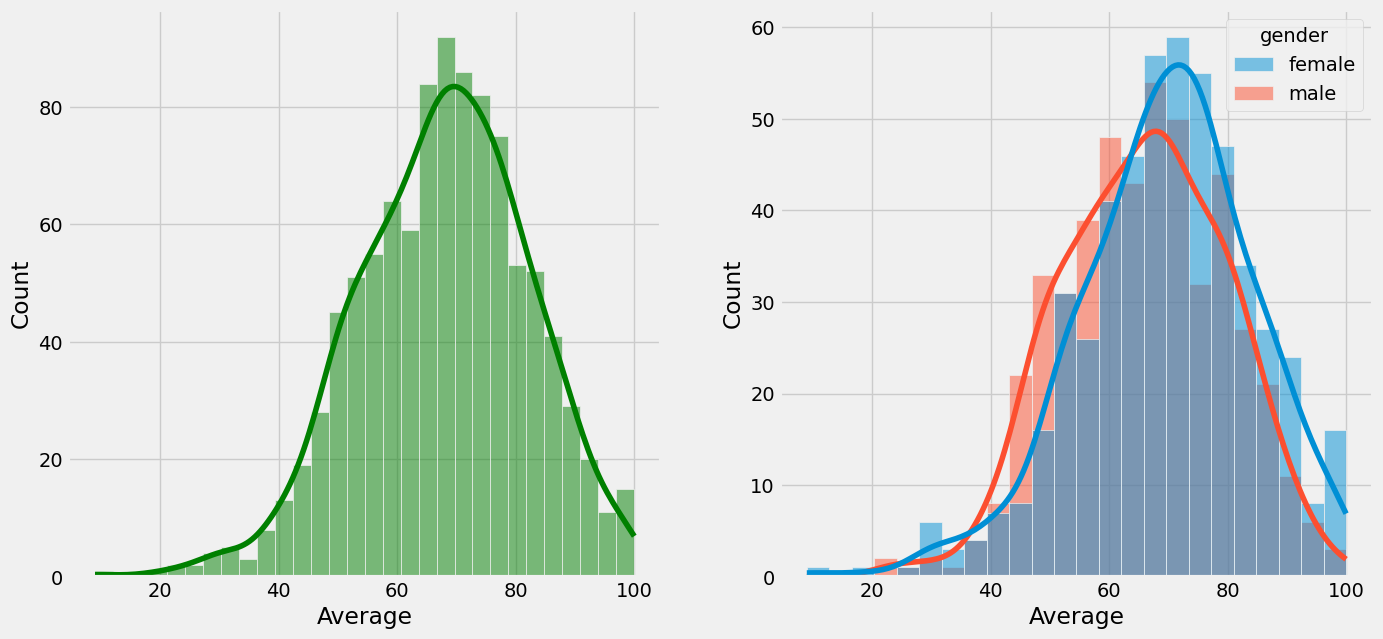

In [104]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x = 'Average', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data=df, x = 'Average', kde = True, hue = 'gender')
plt.show()

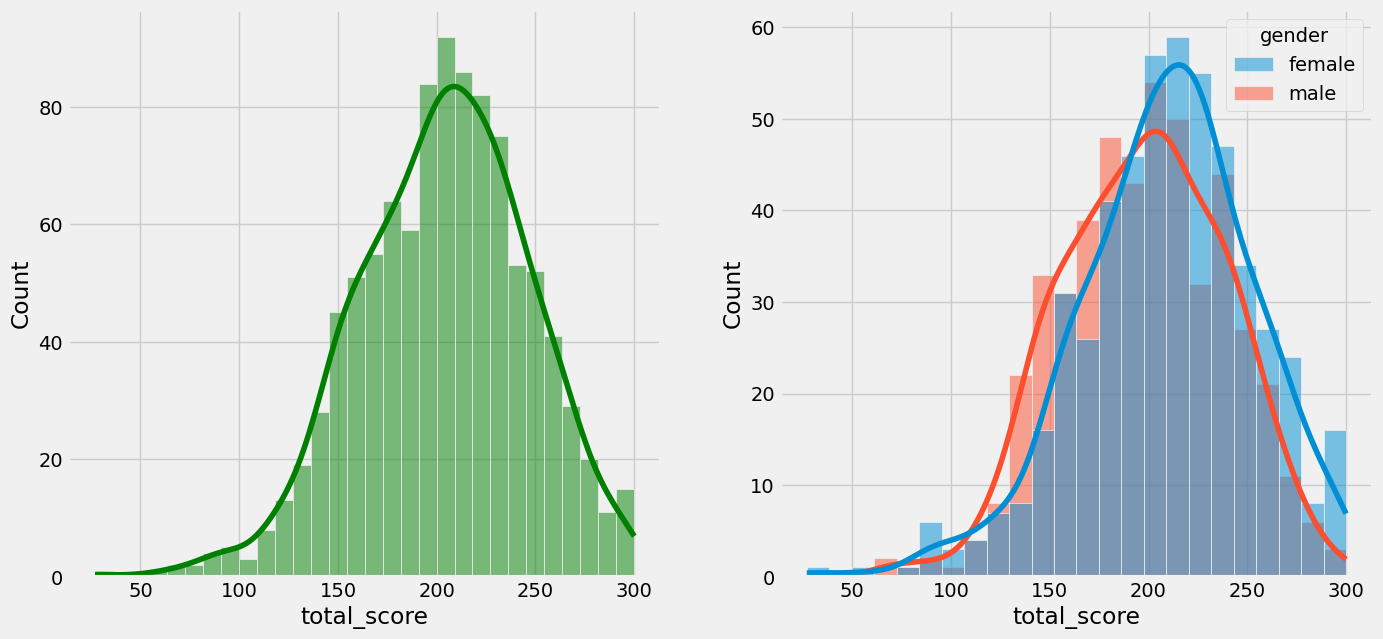

In [79]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x = 'total_score', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data=df, x = 'total_score', kde = True, hue = 'gender')
plt.show()

### Insights 
- Female students tend to perform well than male students.

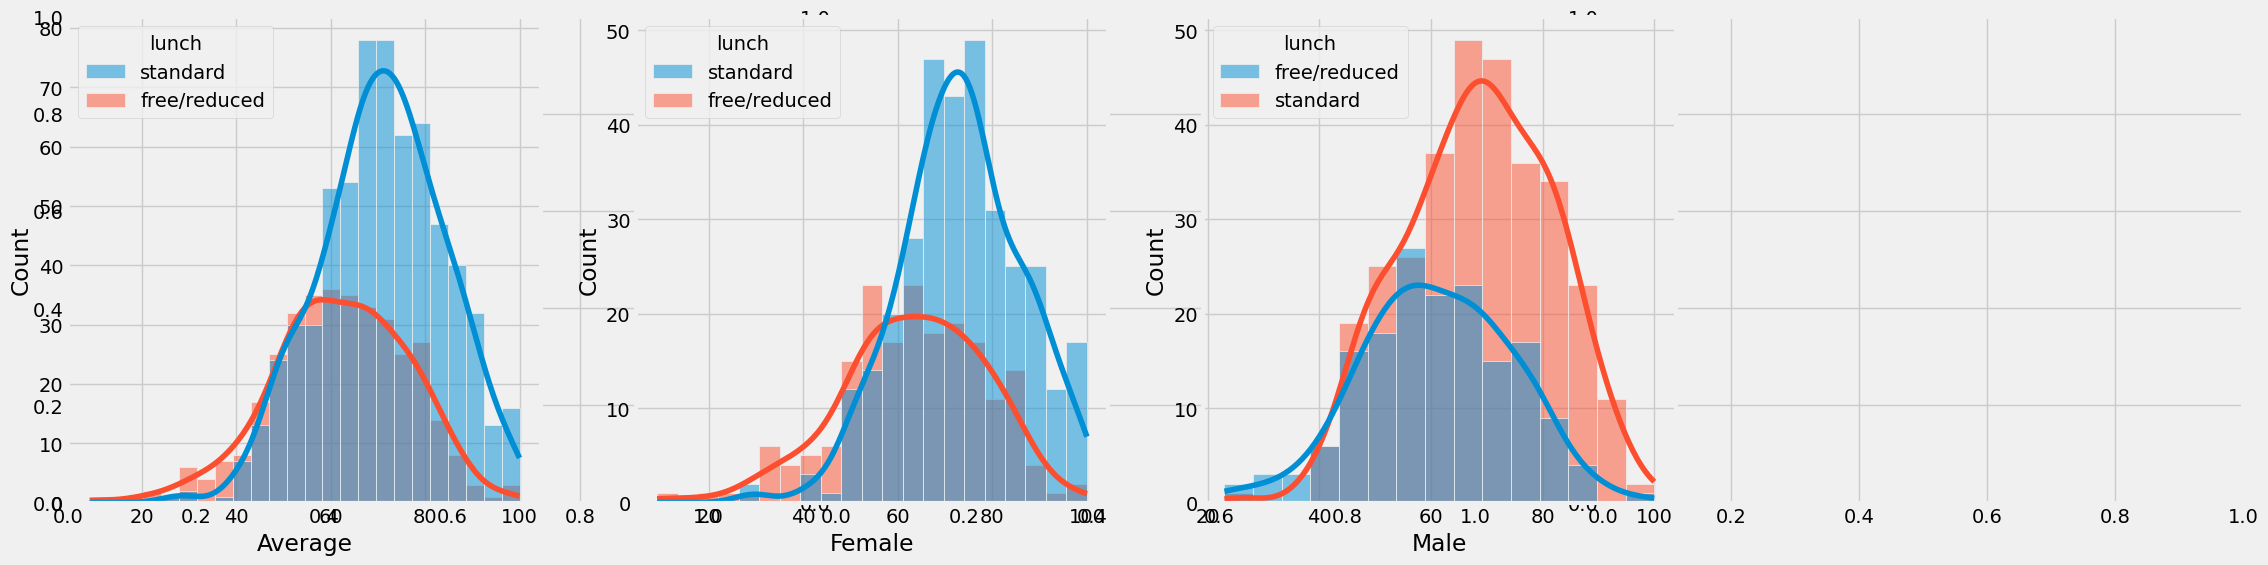

In [106]:
plt.subplots(1,3, figsize= (25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'Average', kde = True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x= 'Average', kde = True, hue = 'lunch')
plt.xlabel('Female')
plt.subplot(143)
sns.histplot(data=df[df.gender== 'male'], x = 'Average', kde = True, hue = 'lunch')
plt.xlabel('Male')
plt.show()

#### Insights

- Standard lunch helps perform will in exams for both males and females.

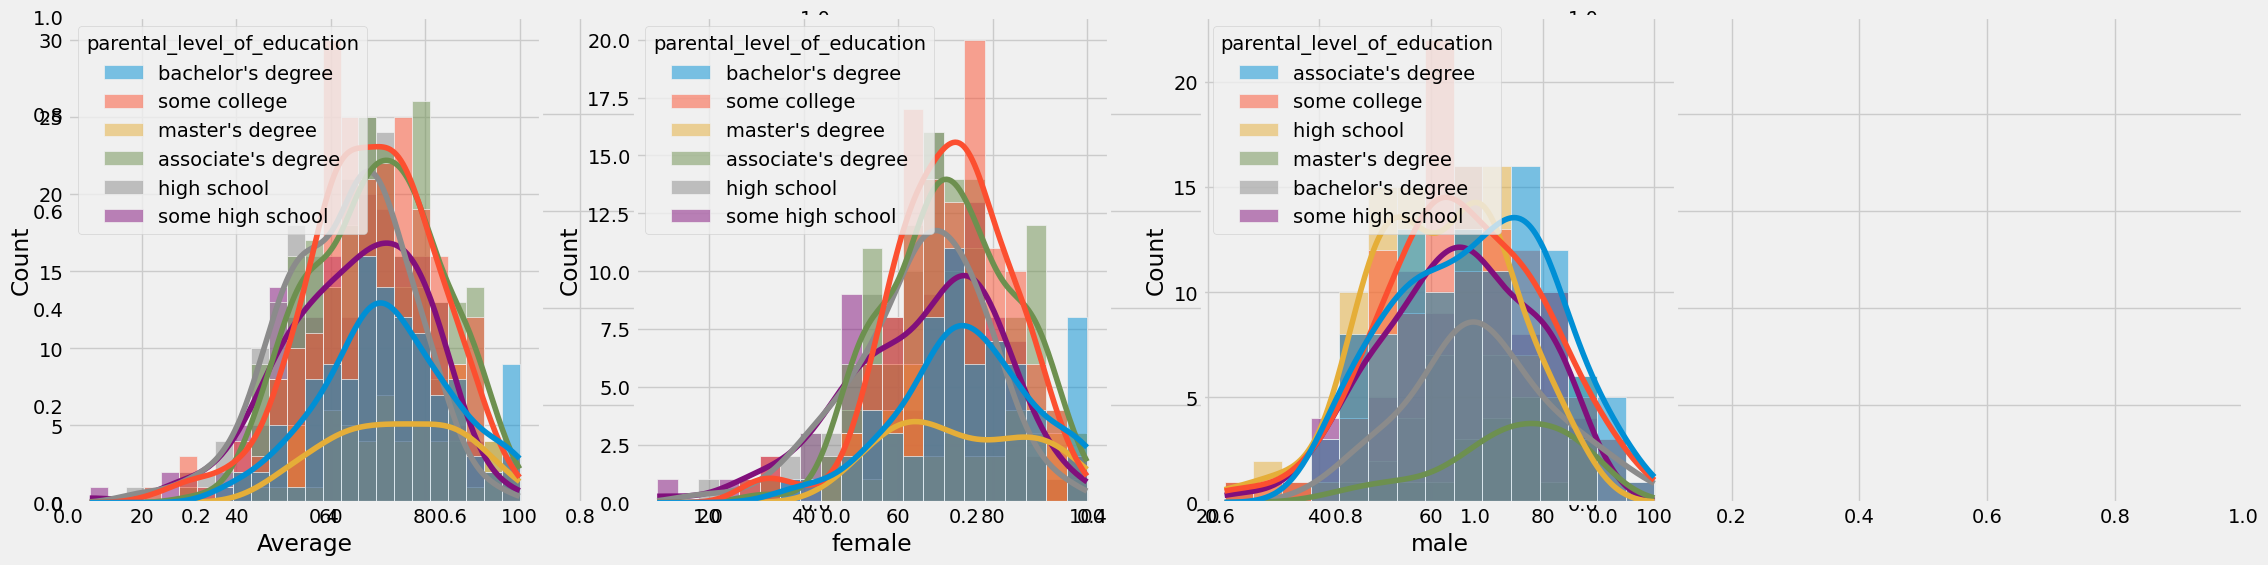

In [108]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax = sns.histplot(data = df, x = 'Average', kde = True, hue = 'parental_level_of_education')
plt.subplot(142)
ax = sns.histplot(data = df[df.gender == 'female'] , x = 'Average', kde = True, hue = 'parental_level_of_education')
plt.xlabel('female')
plt.subplot(143)
ax = sns.histplot(data = df[df.gender == 'male'], x = 'Average', kde = True, hue = 'parental_level_of_education')
plt.xlabel('male')
plt.show()

##### Insights

- In general parent's education don't help student perform well in exam.
- 2nd plot we can see there is no effect of parent's education on femlae students.\
- 3rd plot shows that parent's whose educaton is of associate's degree or master's gefree their male child tend to perform well in exam.

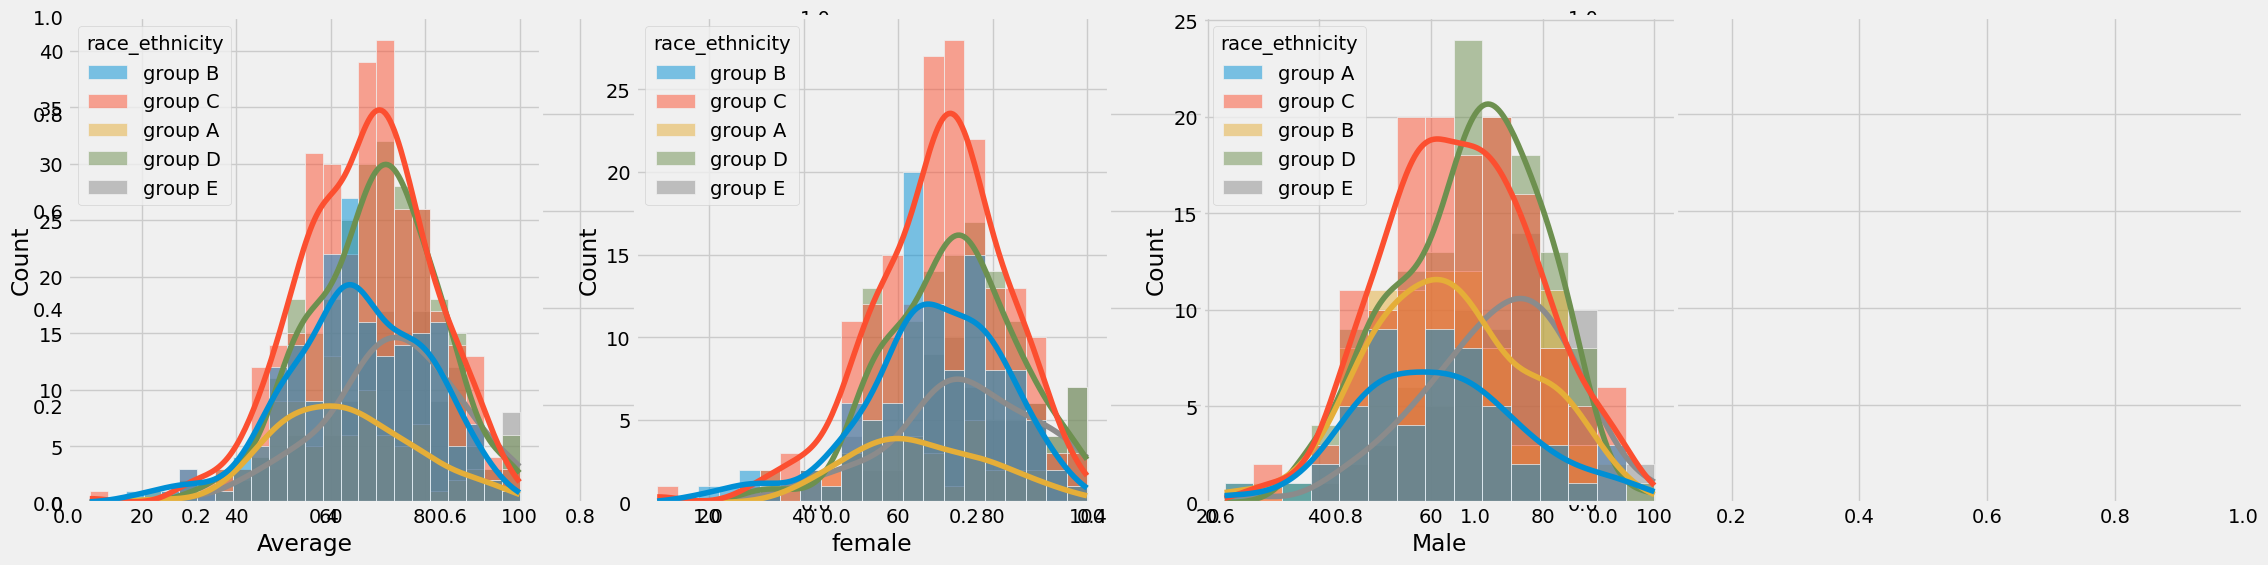

In [109]:
plt.subplots(1,3, figsize = (25, 6))
plt.subplot(141)
ax = sns.histplot(data = df, x = 'Average', kde = True, hue='race_ethnicity')
plt.subplot(142)
ax = sns.histplot(data = df[df.gender == 'female'], x = 'Average', kde=True , hue='race_ethnicity')
plt.xlabel('female')
plt.subplot(143)
ax = sns.histplot(data= df[df.gender == 'male'], x = "Average", kde=True, hue='race_ethnicity')
plt.xlabel("Male")
plt.show()

##### Insights 
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.

#### 4.2) Maximum score of students in all three subjects

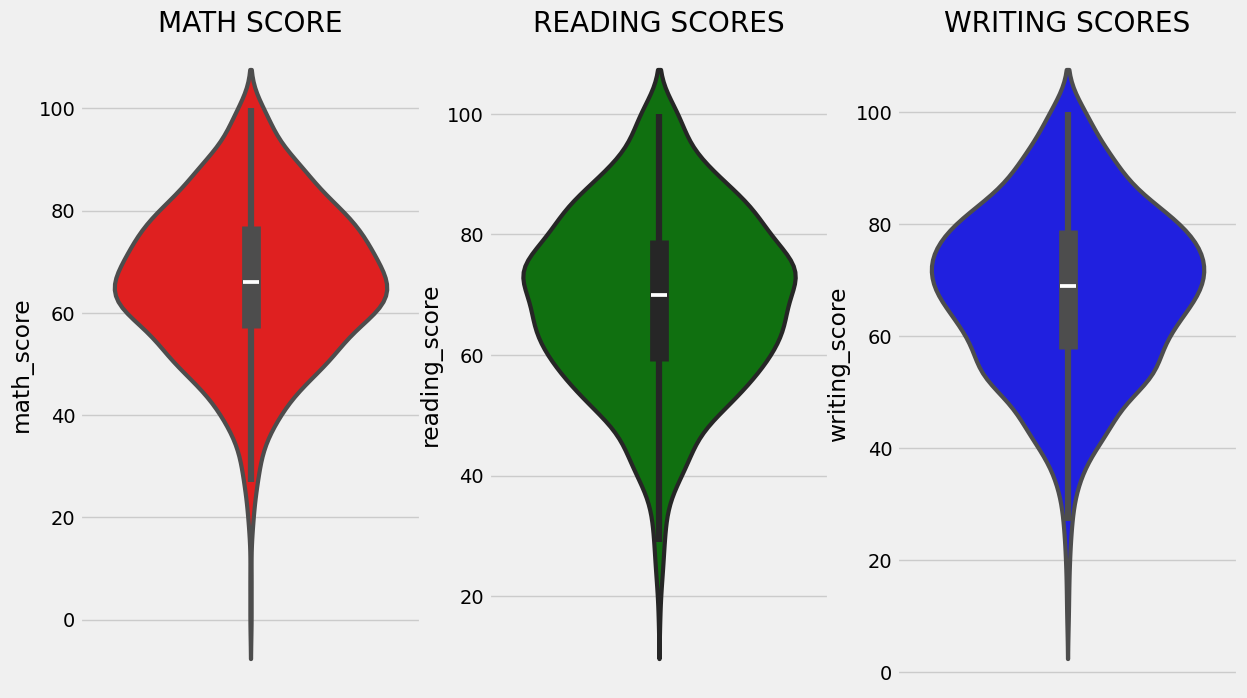

In [83]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title("MATH SCORE")
sns.violinplot(y = 'math_score', data = df, color = 'red', linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORES')
sns.violinplot(y = 'reading_score', data = df, color = 'green', linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORES') 
sns.violinplot(y = 'writing_score', data = df, color = 'blue', linewidth=3)
plt.show()

##### Insights

- From teh above three plots its clearly visible that most of the students score in maths between 60 - 80.
- whereas in reading and writing most of them score from 50 to 80.

#### 4.3) Multivariate analysis using pieplot

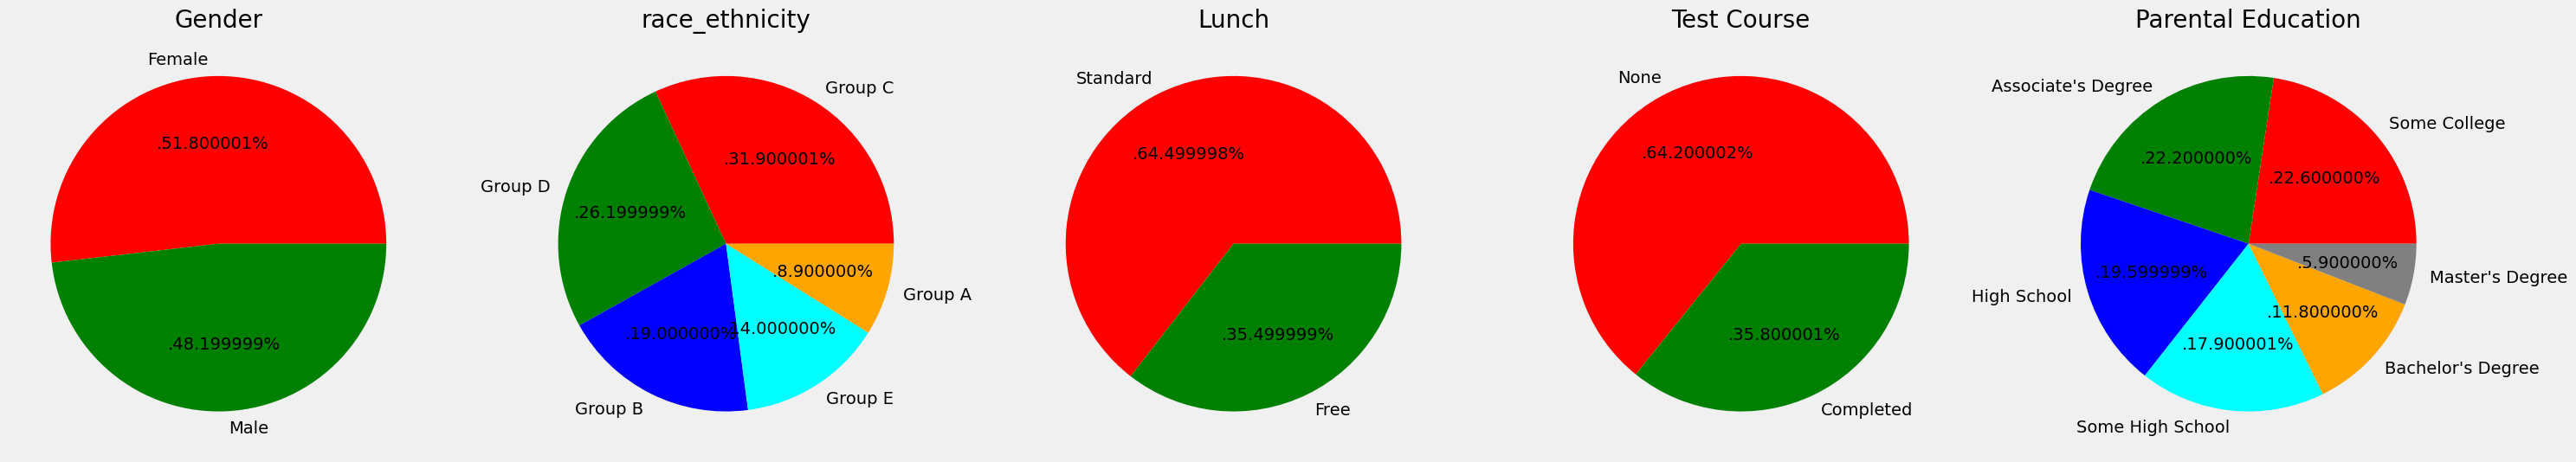

In [84]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female', "Male"
color = ['red', 'green']

plt.pie(size, colors = color, labels=labels, autopct= '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', "Group D", "Group B", "Group E", "Group A"
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors= color, labels= labels, autopct= '.%2f%%')
plt.title('race_ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### Insights 
- Number of Male and Female students is almost equal
- Number of students are greatest in Group C
- Number of students who have standard lunch are higher
- Number of students who have not enrolled in any test preparation course are higher
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### **4.4 Feature Wise Visualization**

#### 4.4.1 GENDER COLUMN

- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

##### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

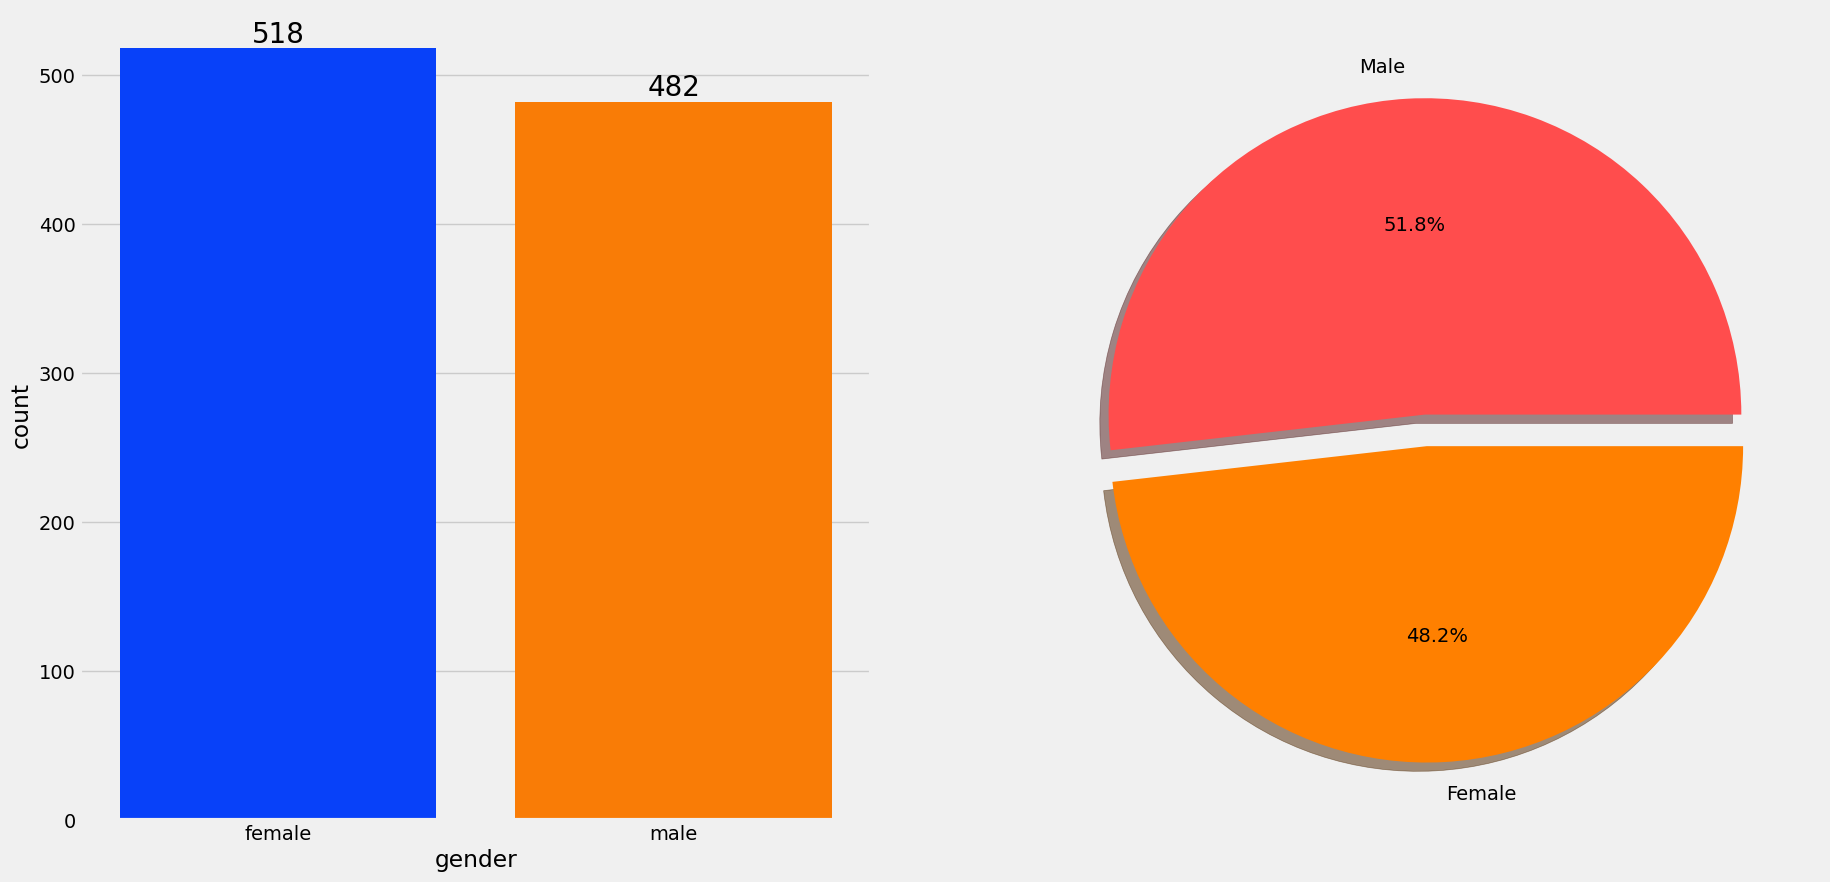

In [85]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True ,colors=['#ff4d4d','#ff8000'])
plt.show()

##### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

##### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

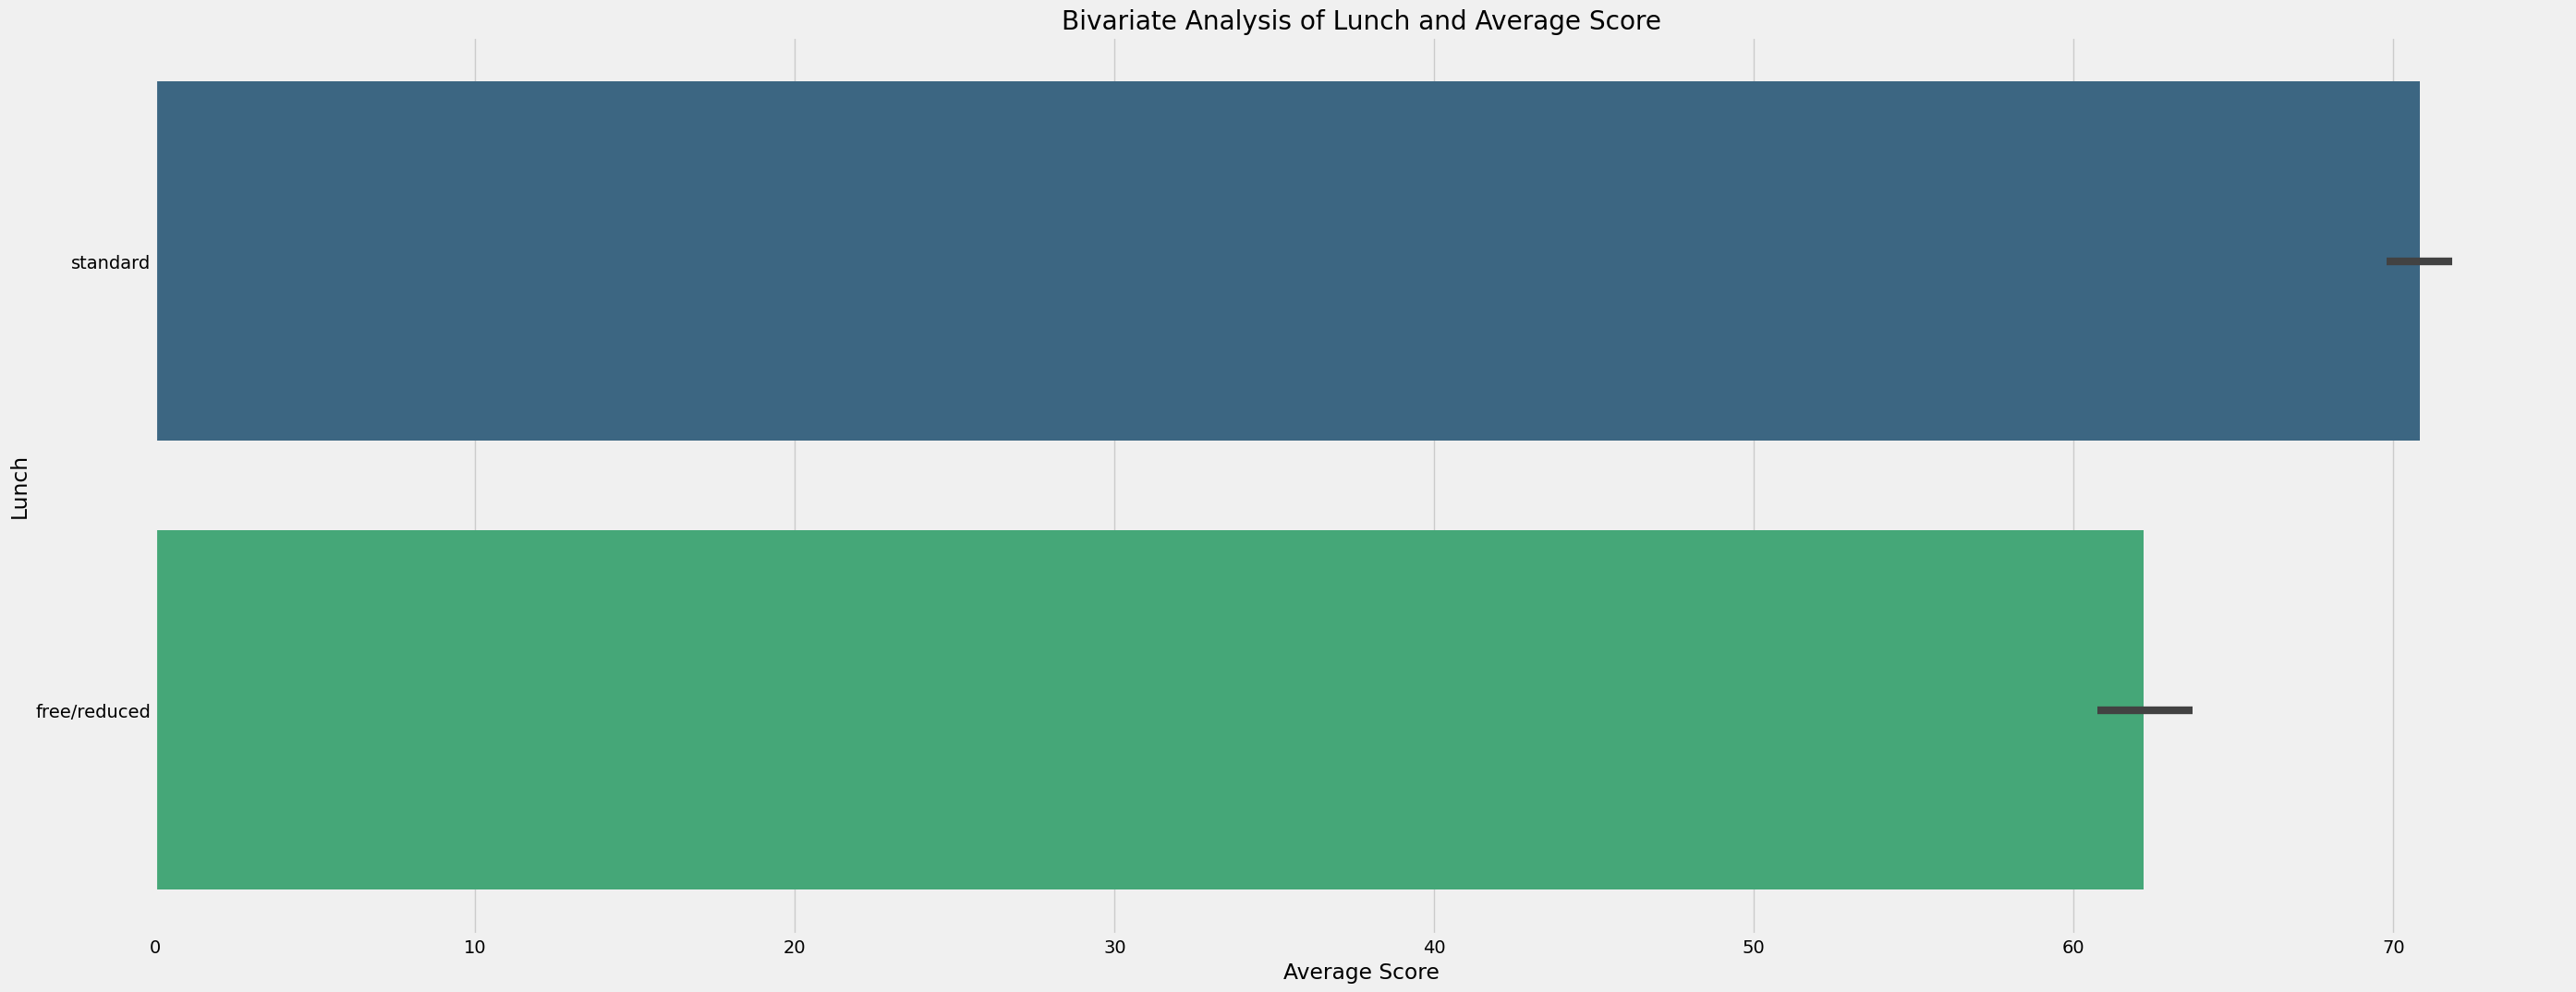

In [86]:
sns.barplot(x = 'Average',
            y = 'lunch',
            data=df, palette='viridis')

plt.title('Bivariate Analysis of Lunch and Average Score')
plt.xlabel('Average Score')
plt.ylabel('Lunch')
plt.show()

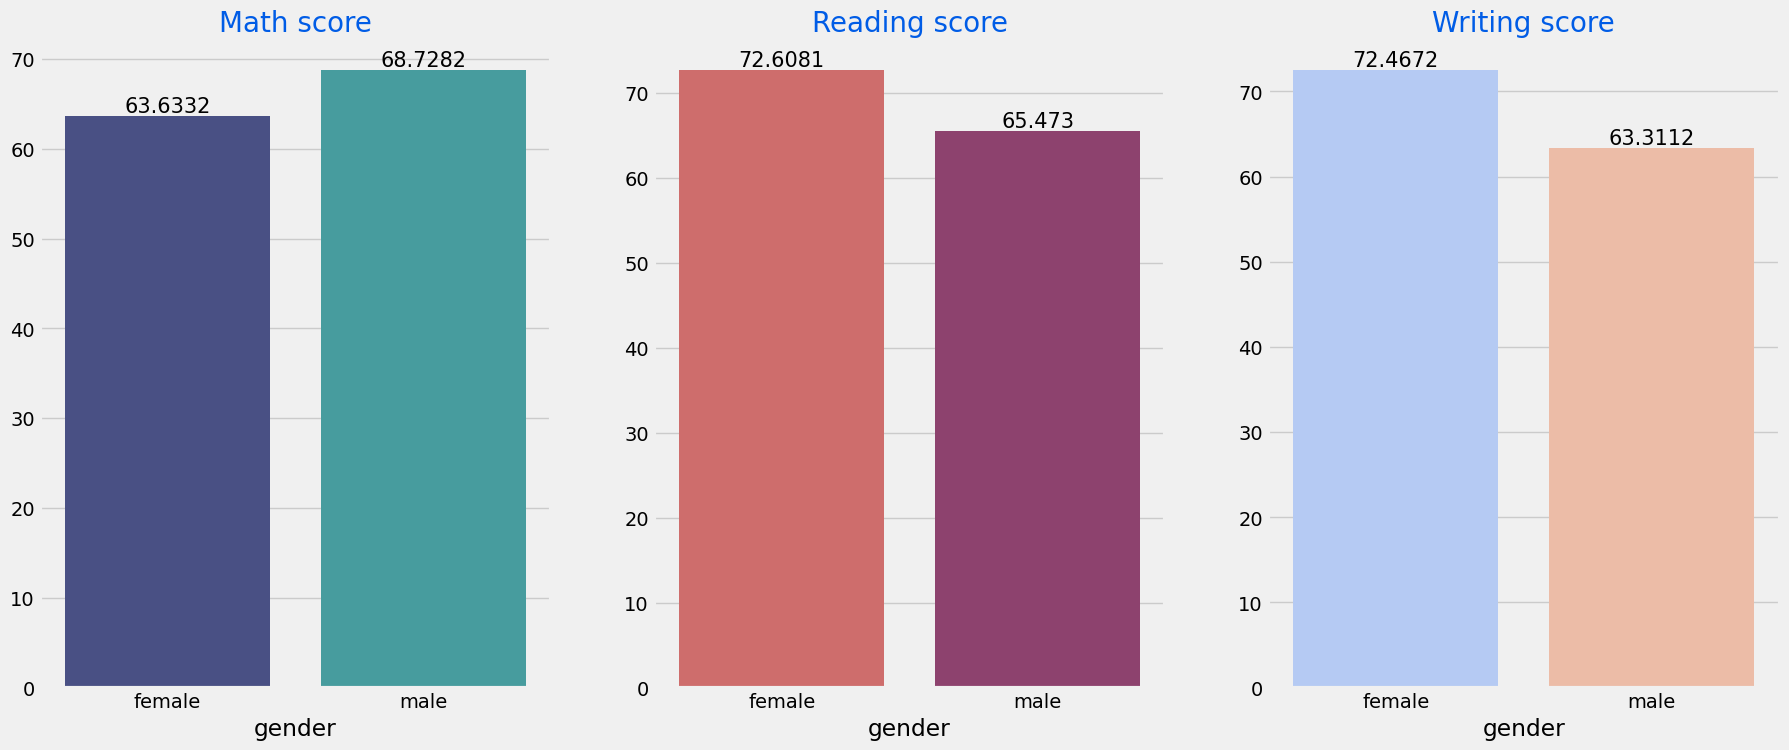

In [87]:
Group_data=df.groupby('gender')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data['math_score'].mean().index,y=Group_data['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data['reading_score'].mean().index,y=Group_data['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data['writing_score'].mean().index,y=Group_data['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

##### Insights
- On an average females have a better overall score than men
- whereas male have scored higher in Maths

#### 4.4.2) RACE/ETHNICITY COLUMN  
- How is Group wise distribution?
- Is Race/Ethnicity has any impact on student's performance?

#### Univariate Analysis ( How is Group wise distribution?)

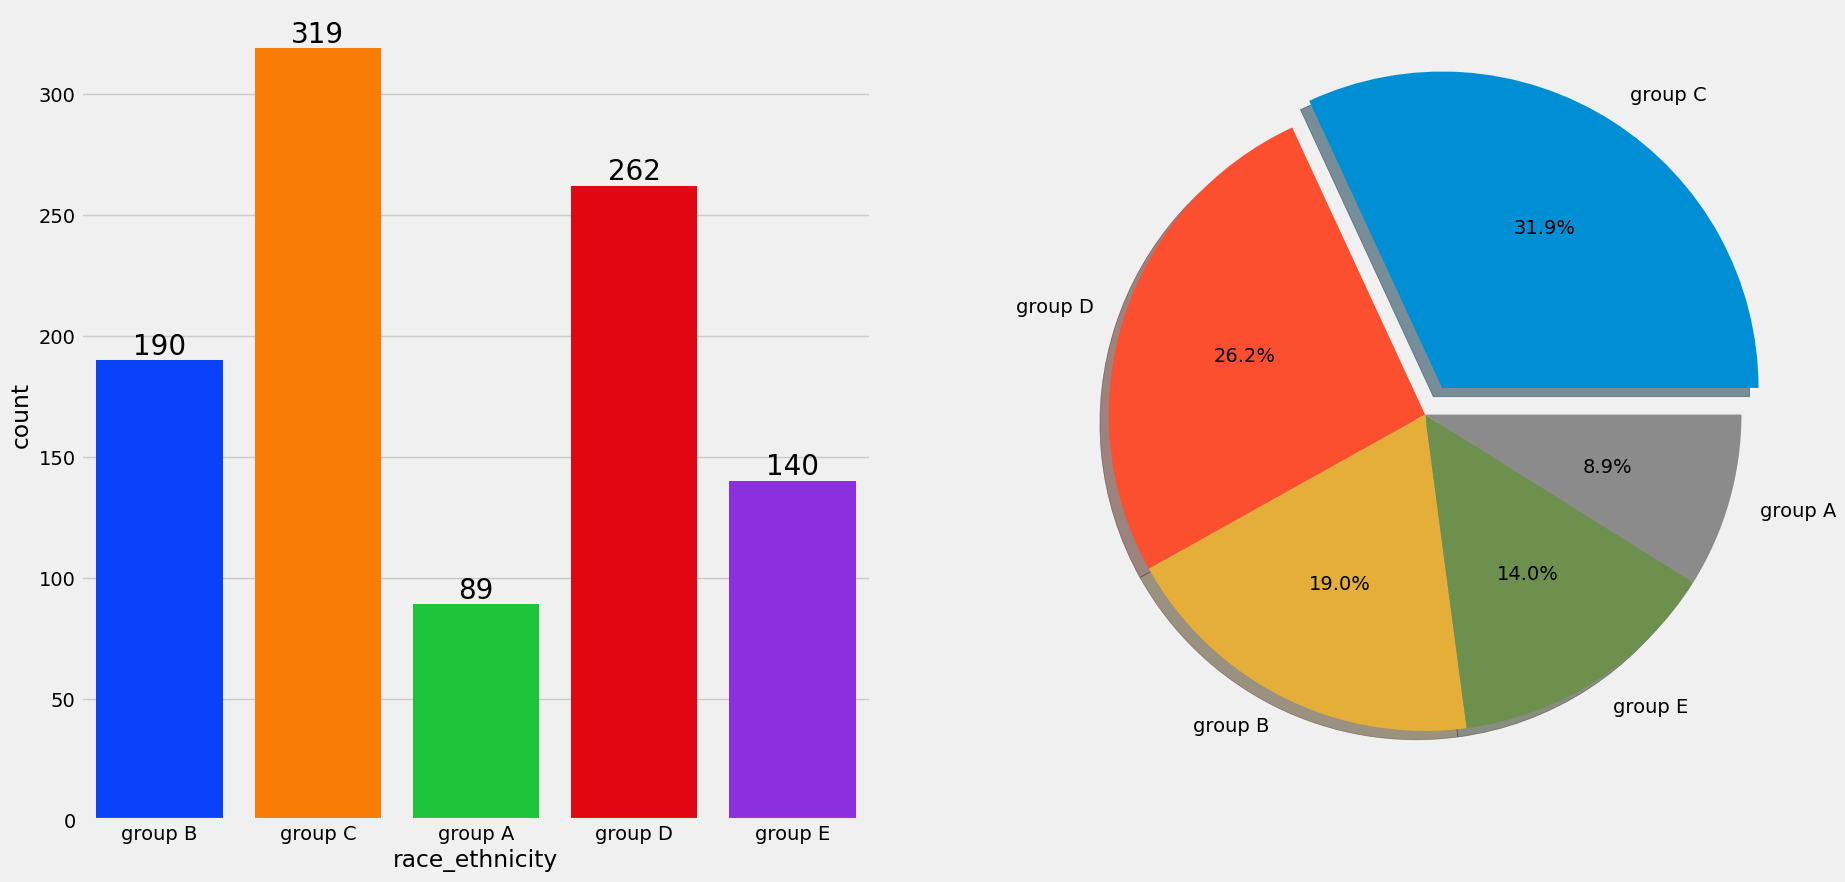

In [88]:
f, ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size = 20)
    
plt.pie(x = df['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].value_counts().index, explode=[0.1,0,0,0,0], autopct='%1.1f%%',shadow=True)
plt.show()

#### Insights
- Most of the student belonging from group C and Group D
- Lowest number of studnets belong to Group A

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

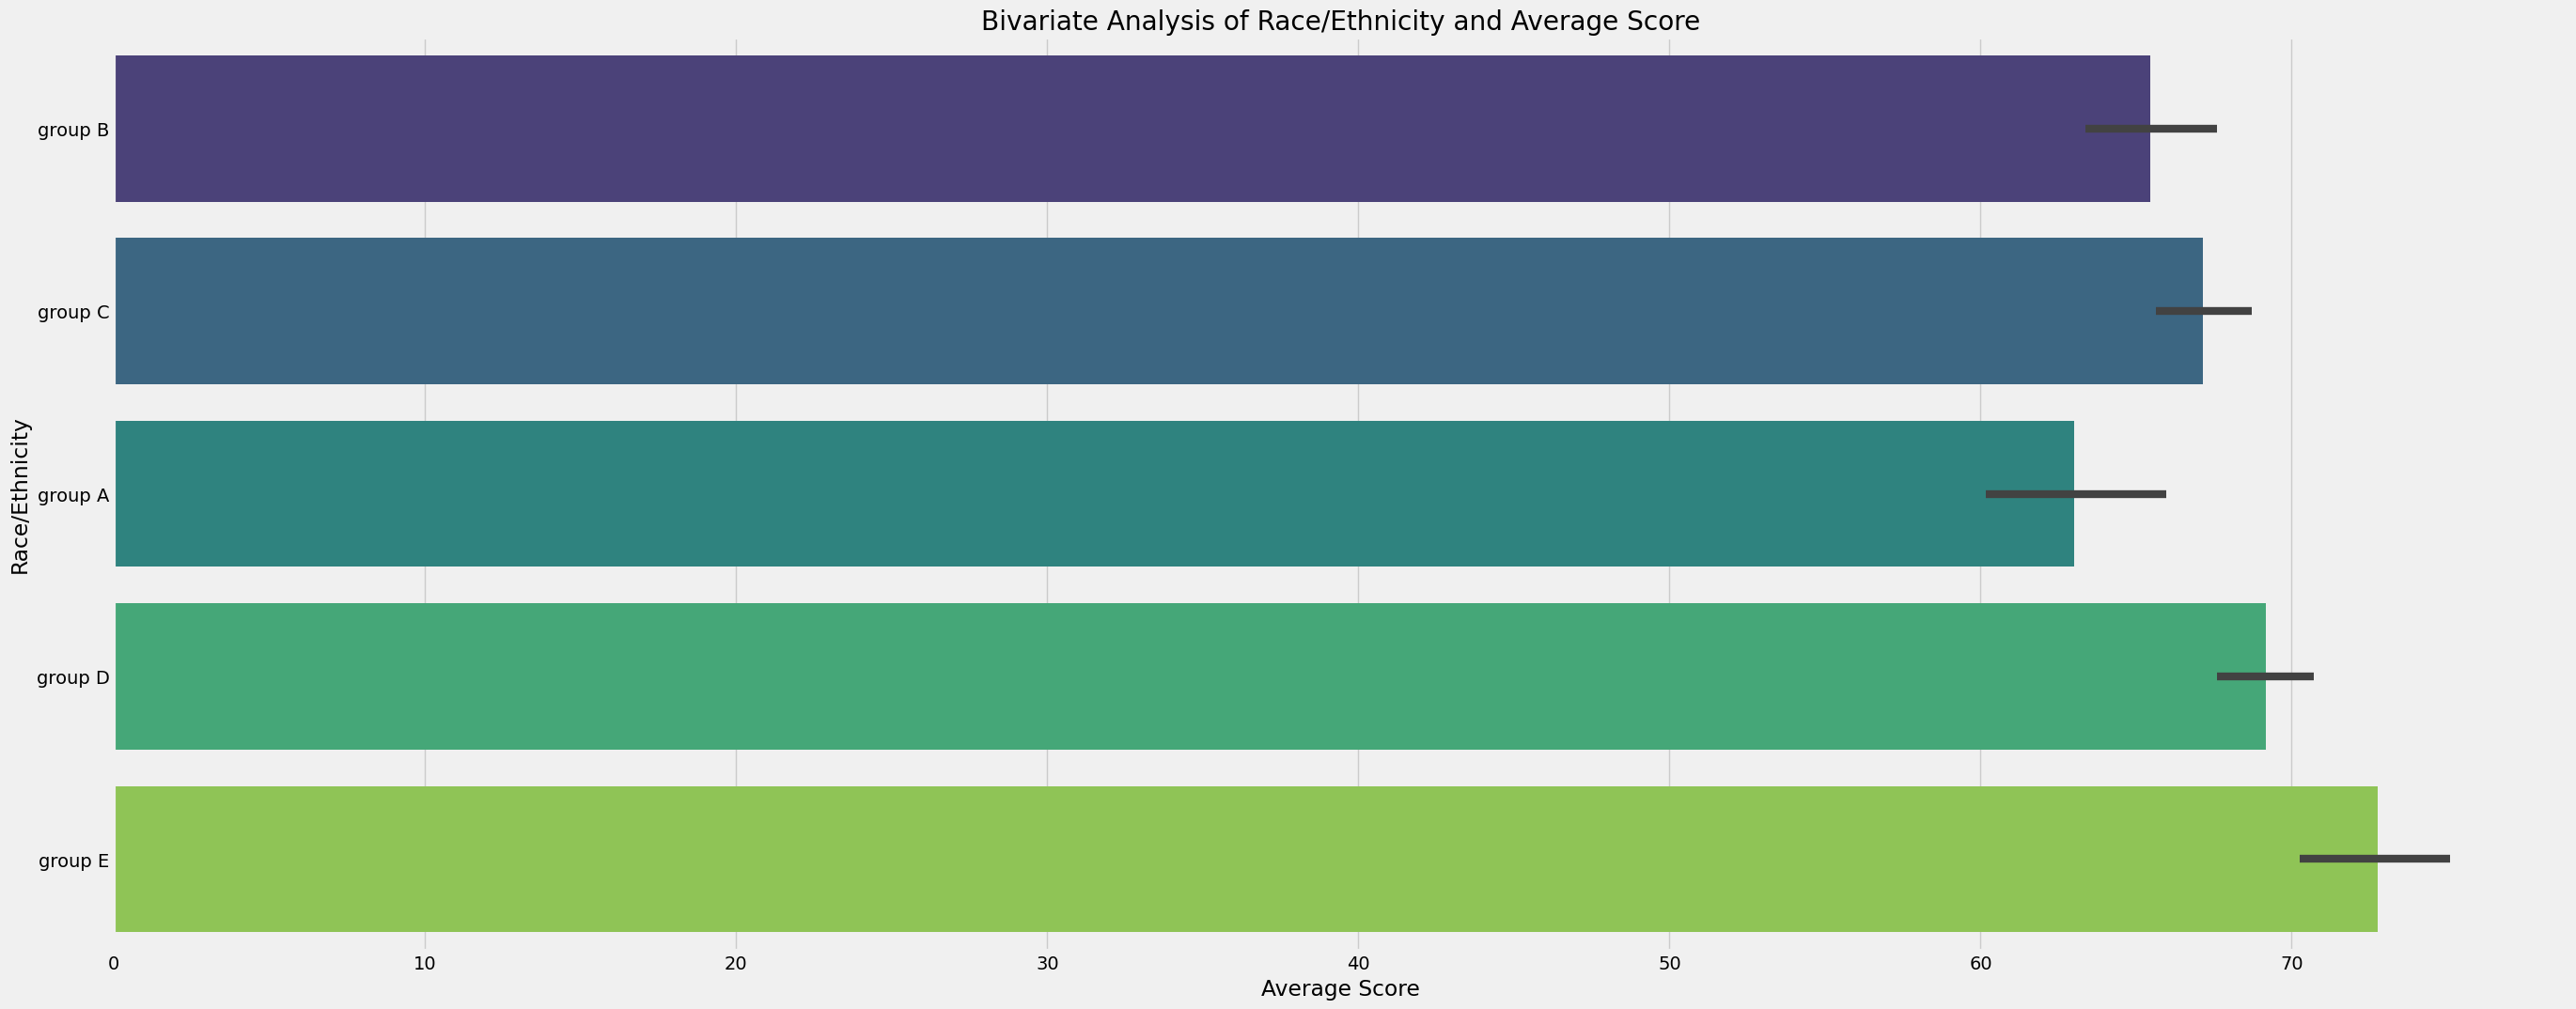

In [89]:
sns.barplot(x = 'Average',
            y = 'race_ethnicity',
            data=df, palette='viridis')

plt.title('Bivariate Analysis of Race/Ethnicity and Average Score')
plt.xlabel('Average Score')
plt.ylabel('Race/Ethnicity')
plt.show()

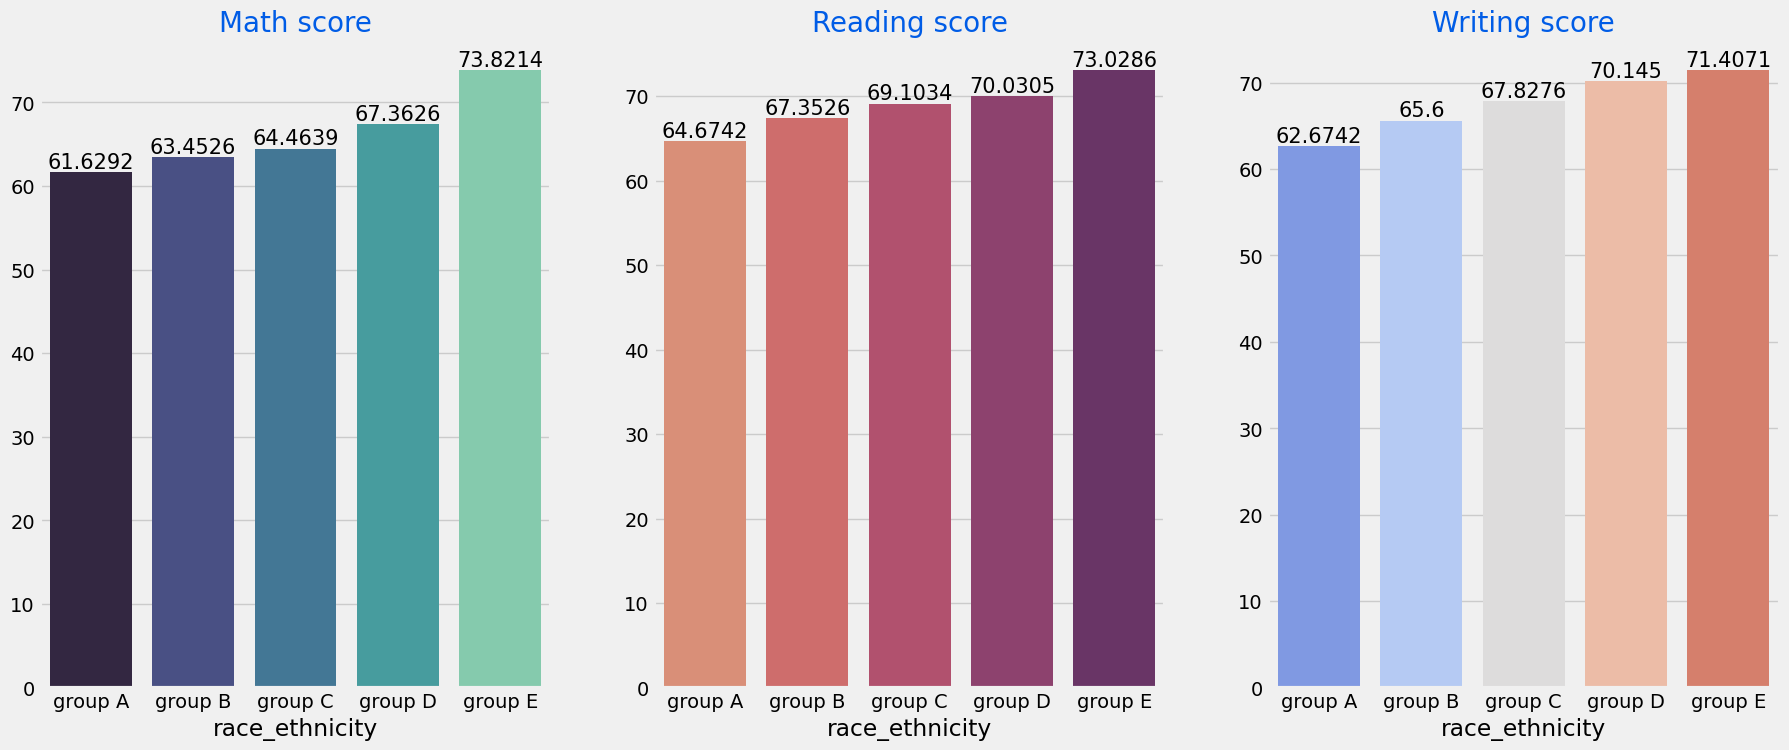

In [90]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### Insights
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- s parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

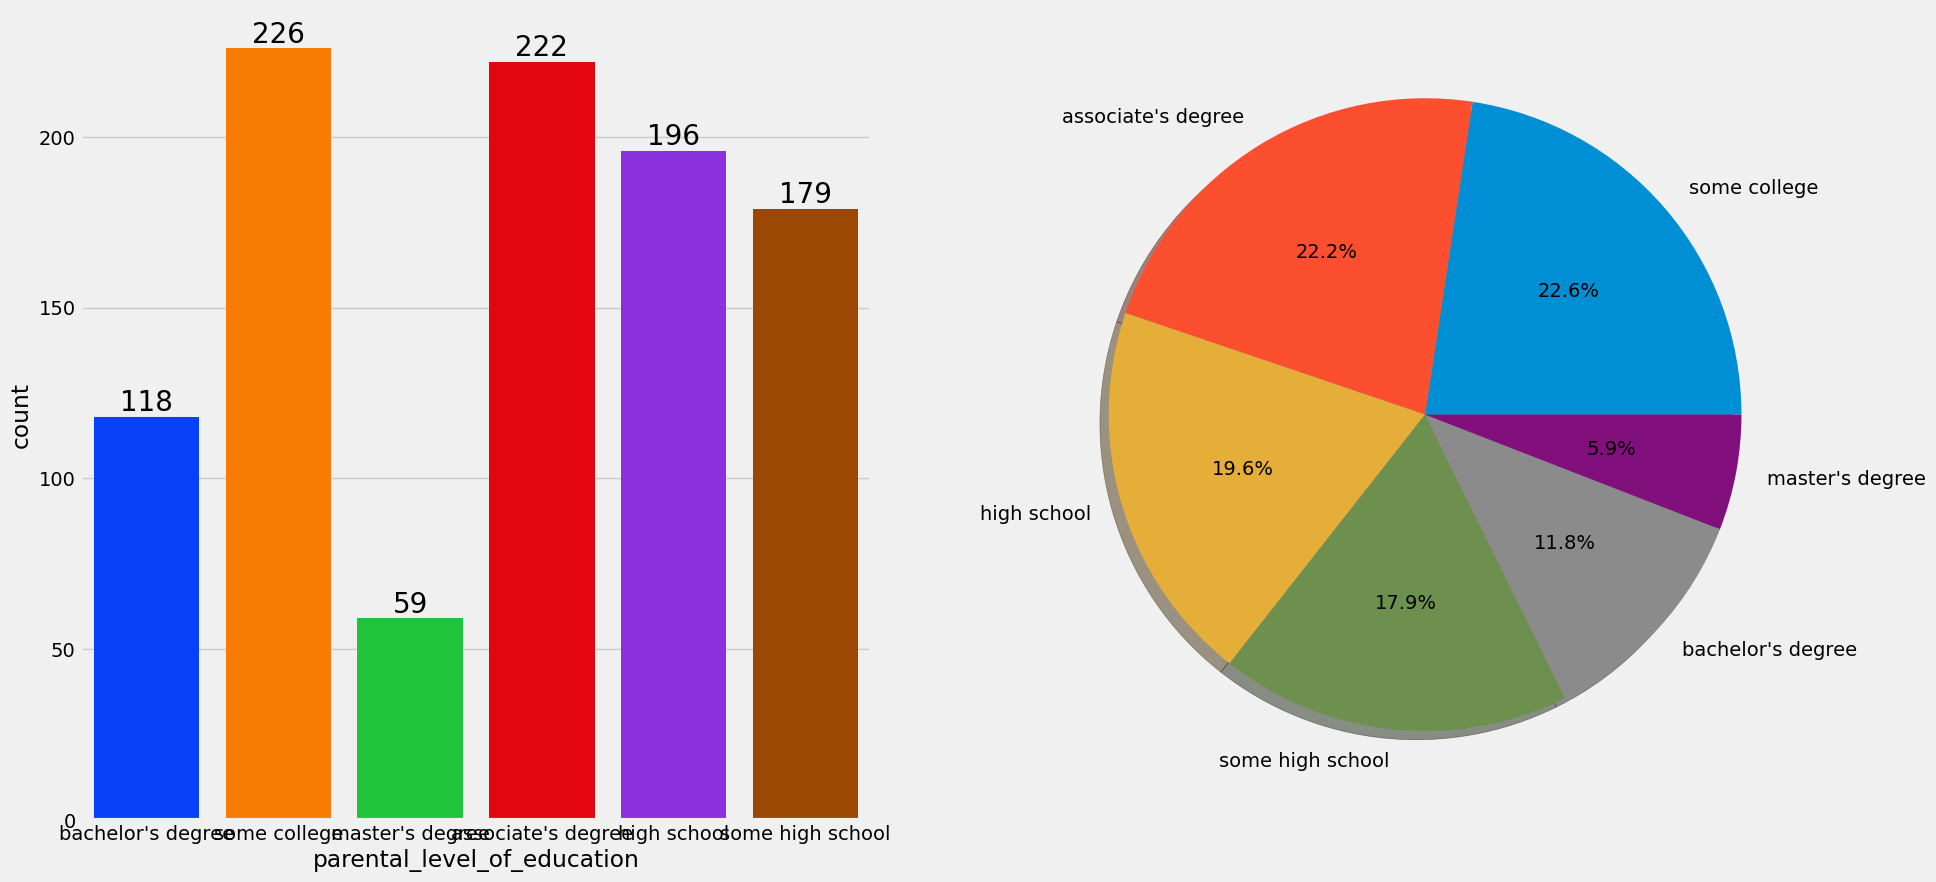

In [111]:
f, ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['parental_level_of_education'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size = 20)
    
plt.pie(x = df['parental_level_of_education'].value_counts(), labels=df['parental_level_of_education'].value_counts().index, autopct='%1.1f%%',shadow=True)
plt.show()

#### Insights
- Largest number of parents are from "some college" followed by "Associate's Degree".

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

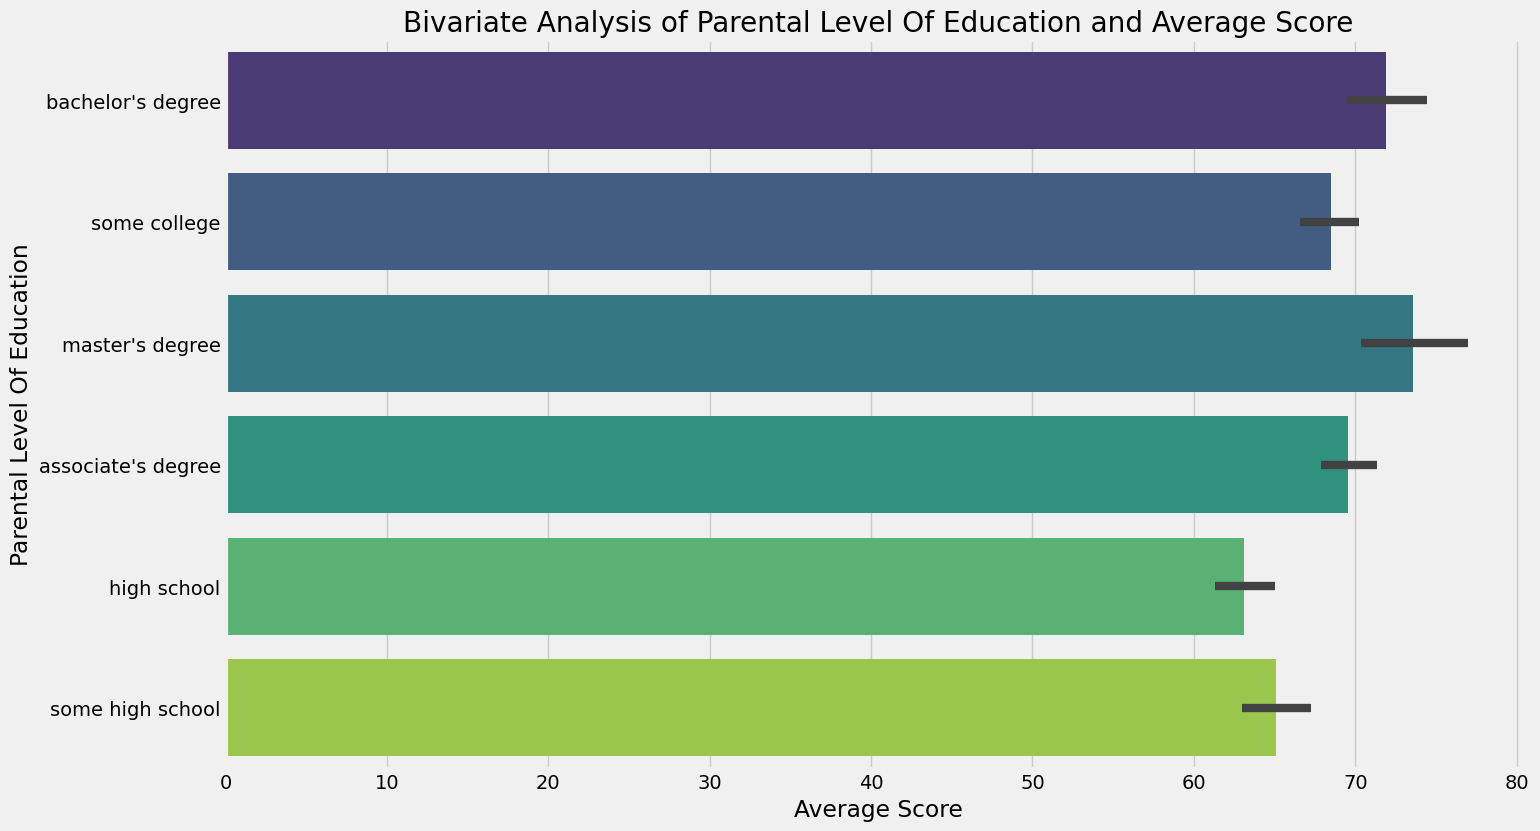

In [92]:
sns.barplot(x = 'Average',
            y = 'parental_level_of_education',
            data=df, palette='viridis')

plt.title('Bivariate Analysis of Parental Level Of Education and Average Score')
plt.xlabel('Average Score')
plt.ylabel('Parental Level Of Education')
plt.show()

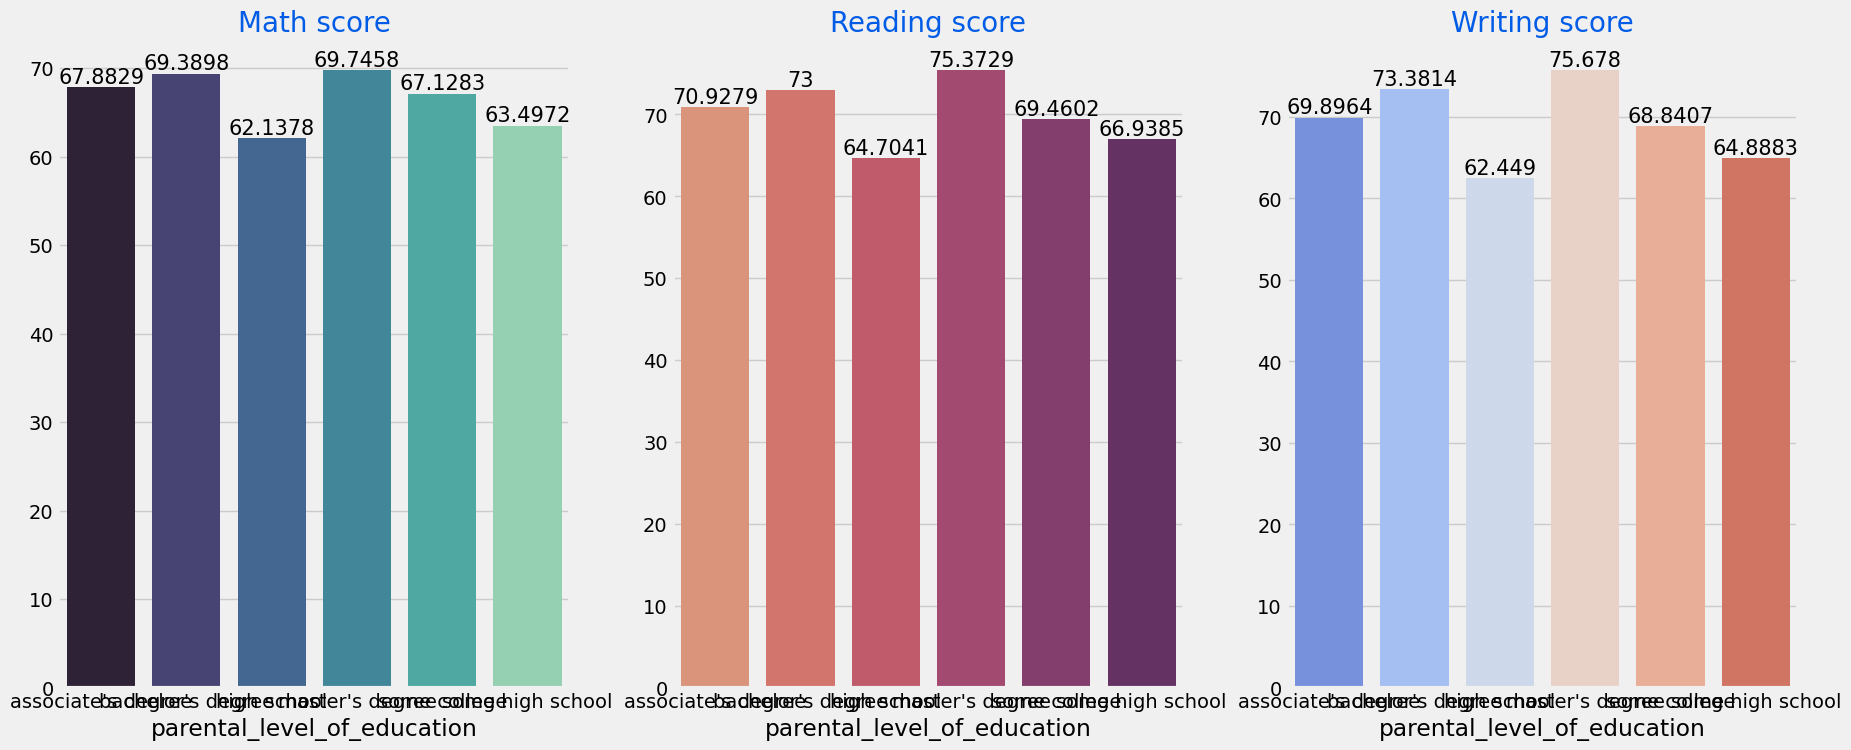

In [93]:
Group_data2=df.groupby('parental_level_of_education')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

### 4.4.4 LUNCH COLUMN
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

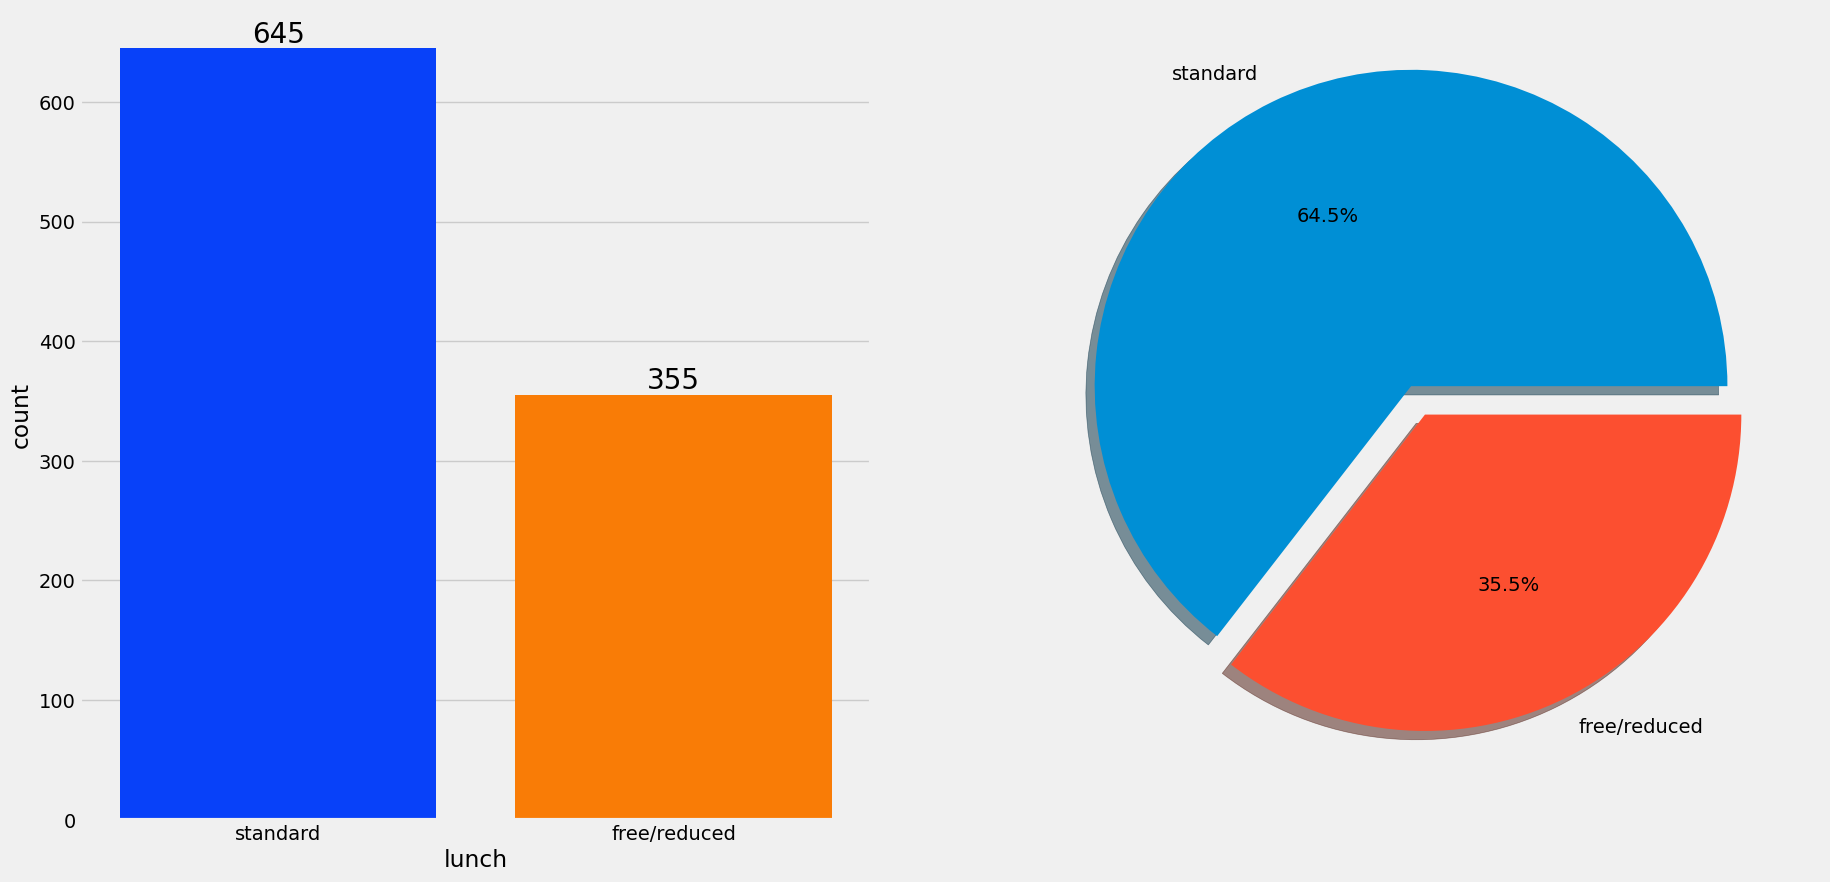

In [112]:
f, ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['lunch'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size = 20)
    
plt.pie(x = df['lunch'].value_counts(), labels=df['lunch'].value_counts().index, explode=[0.1,0], autopct='%1.1f%%',shadow=True)
plt.show()

#### Insights
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

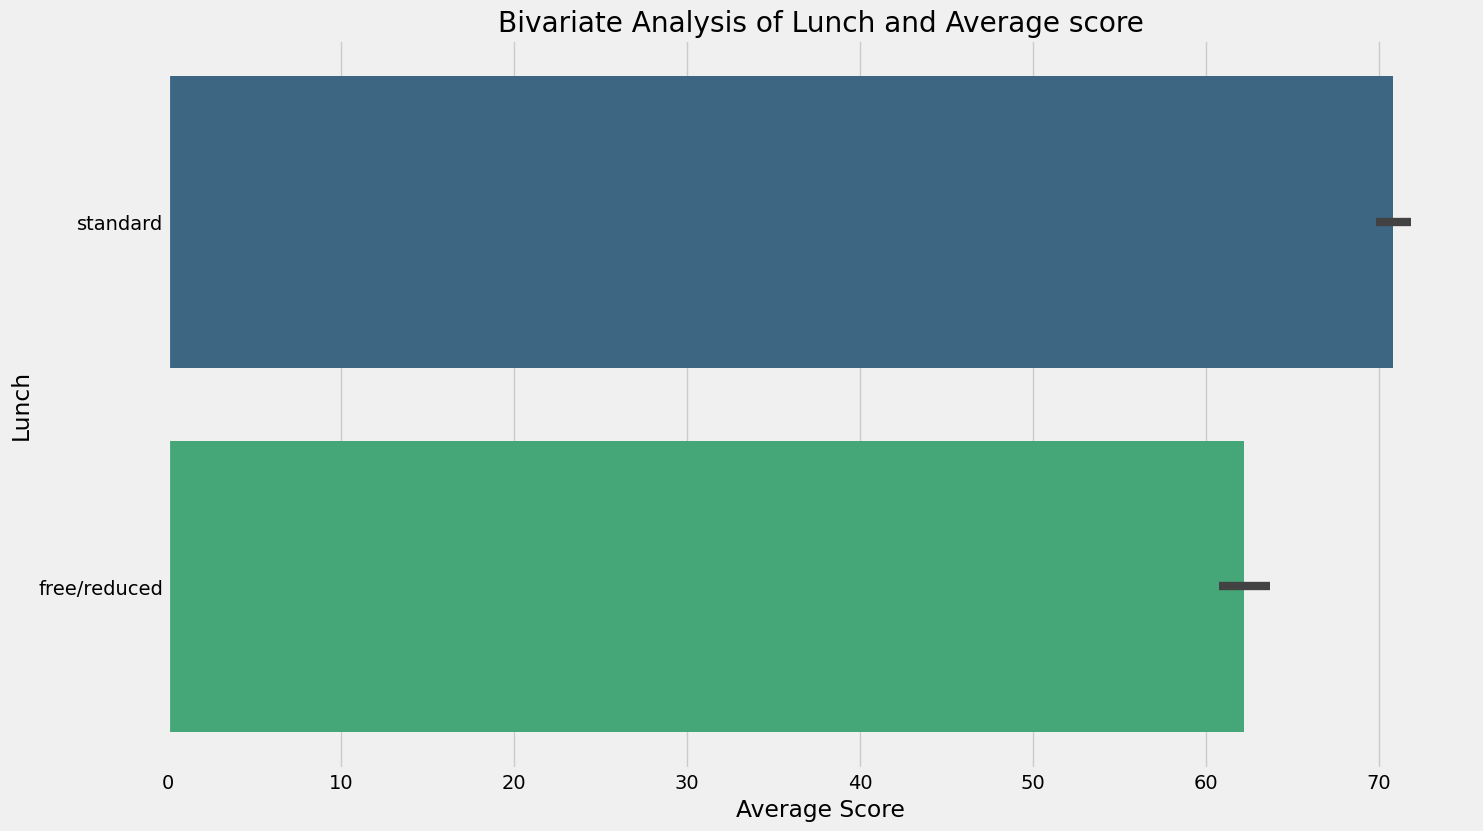

In [95]:
sns.barplot(x = 'Average',
            y = 'lunch',
            data=df, palette='viridis')

plt.title('Bivariate Analysis of Lunch and Average score')
plt.xlabel('Average Score')
plt.ylabel('Lunch')
plt.show()

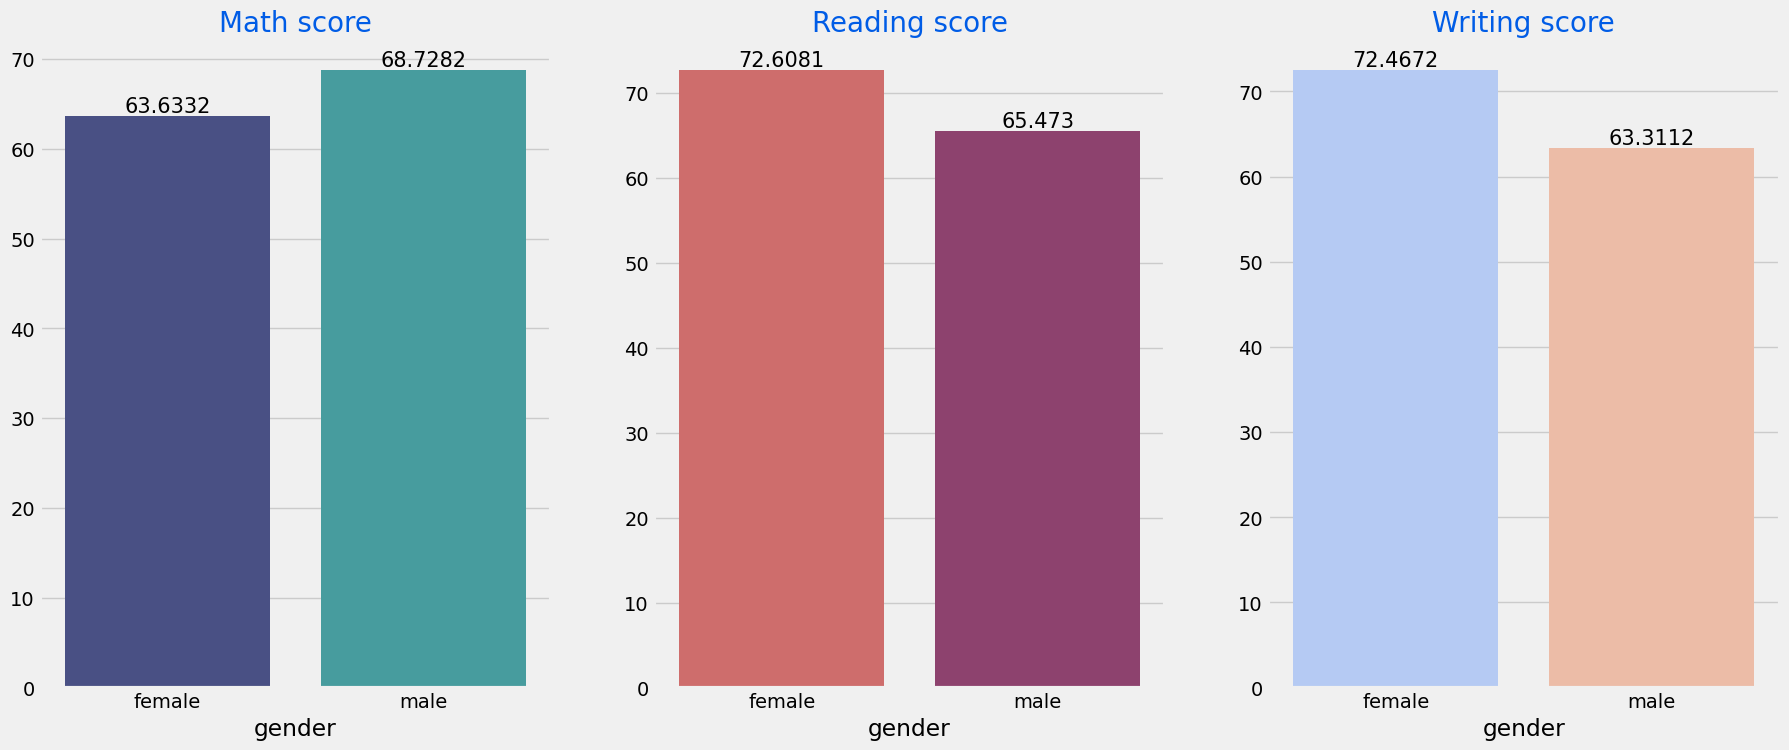

In [96]:
Group_data2=df.groupby('gender')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### UNIVARIATE ANALYSIS (How many student opt for test preparation course ?)

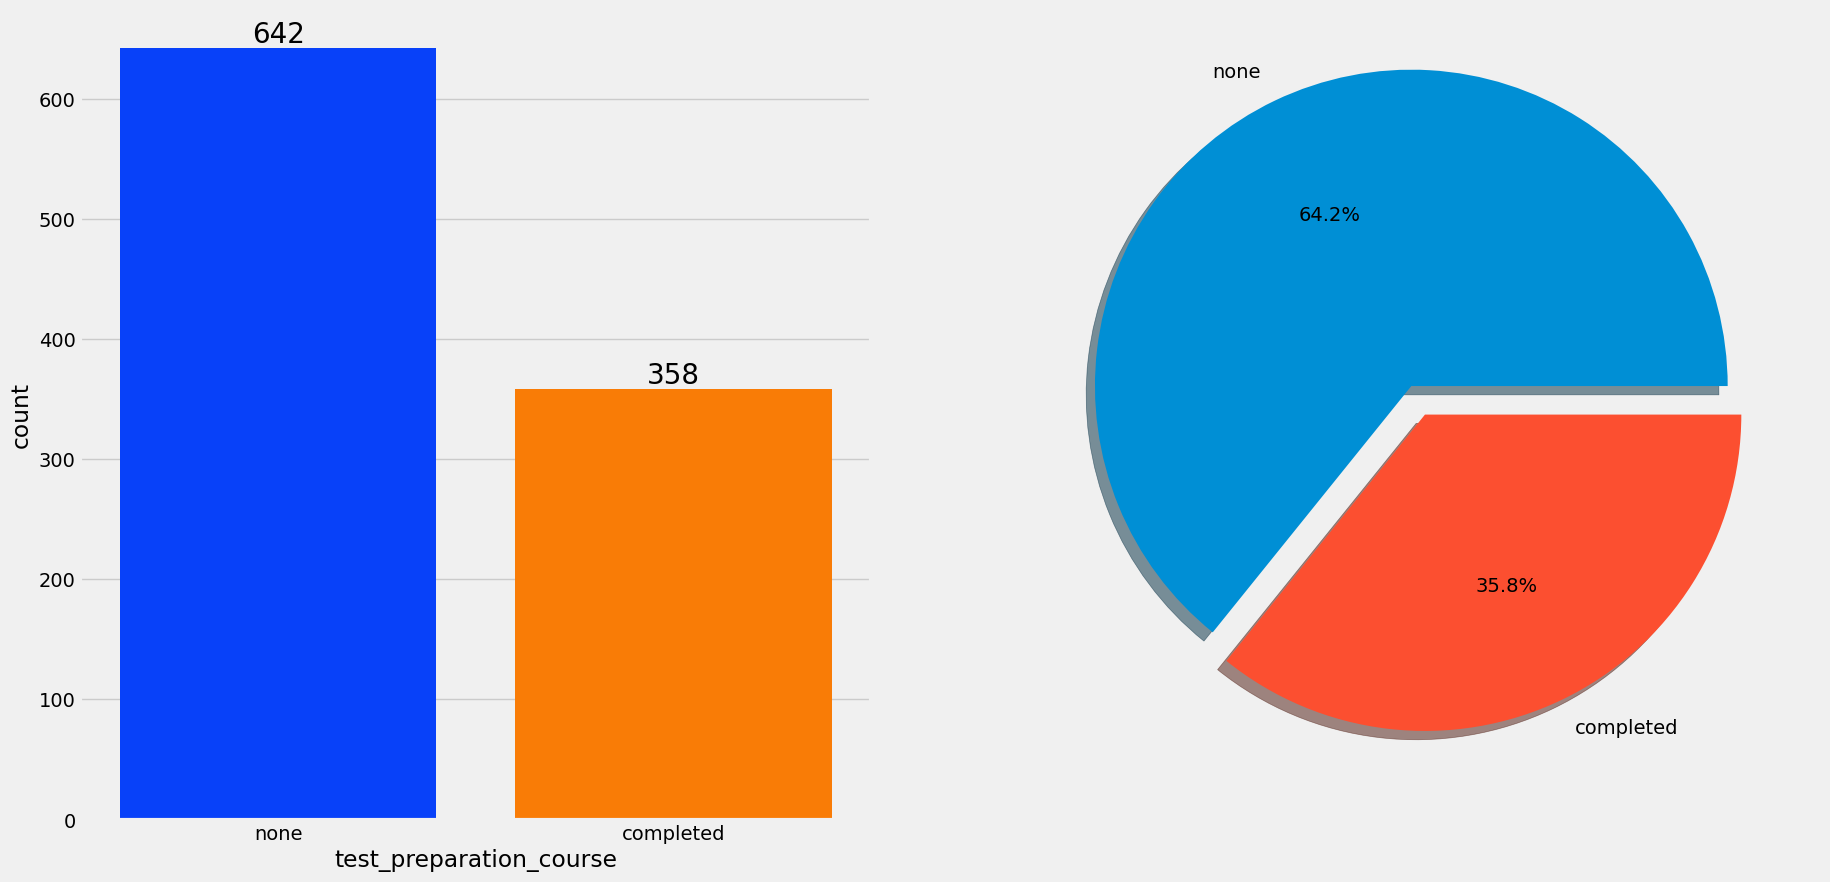

In [113]:
f, ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['test_preparation_course'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size = 20)
    
plt.pie(x = df['test_preparation_course'].value_counts(), labels=df['test_preparation_course'].value_counts().index, explode=[0.1,0], autopct='%1.1f%%',shadow=True)
plt.show()

#### Insights 
- Most of the student don't complete test preparation course.

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

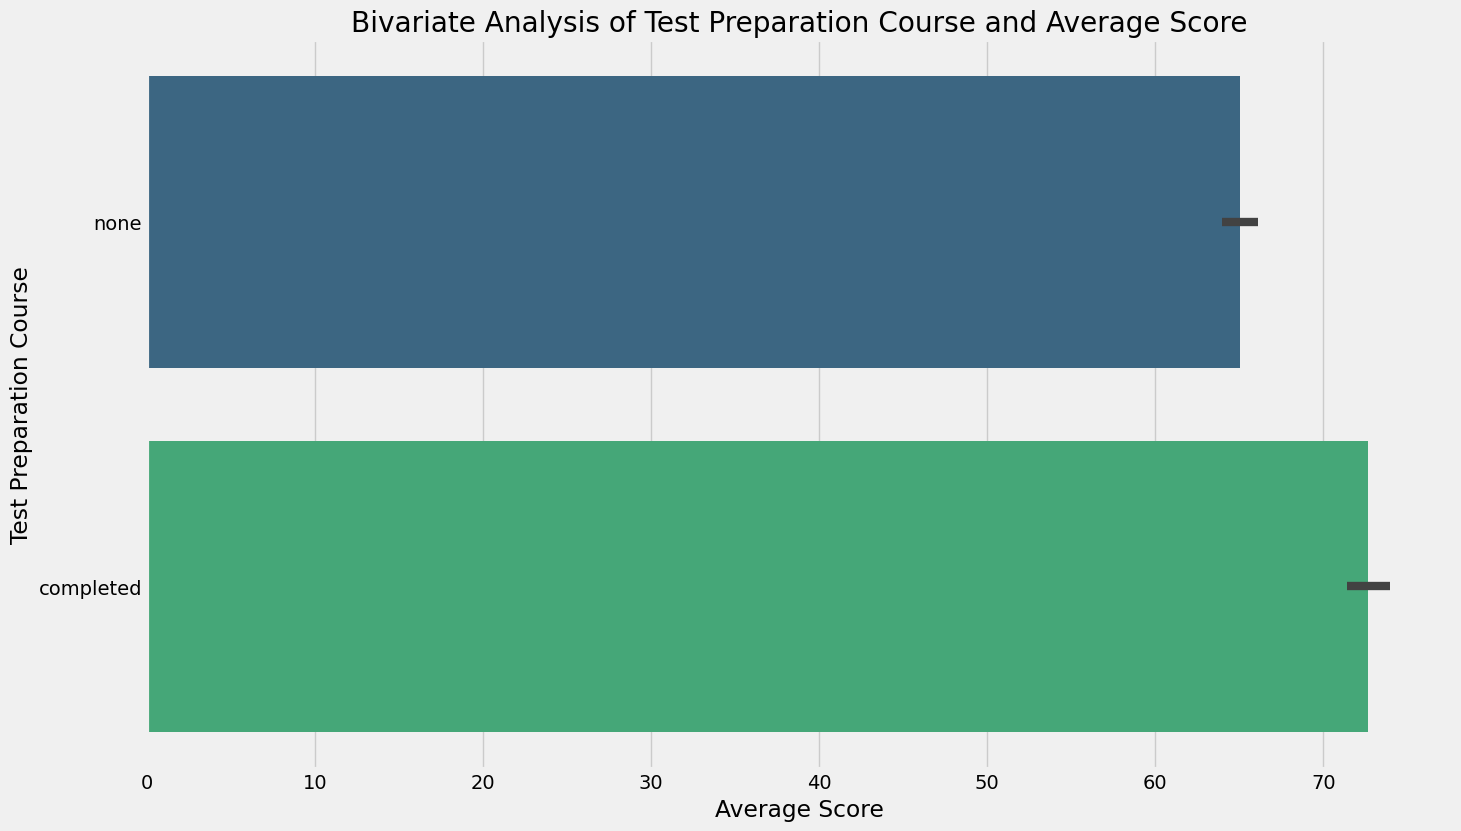

In [98]:
sns.barplot(x = 'Average',
            y = 'test_preparation_course',
            data=df, palette='viridis')

plt.title('Bivariate Analysis of Test Preparation Course and Average Score')
plt.xlabel('Average Score')
plt.ylabel('Test Preparation Course')
plt.show()

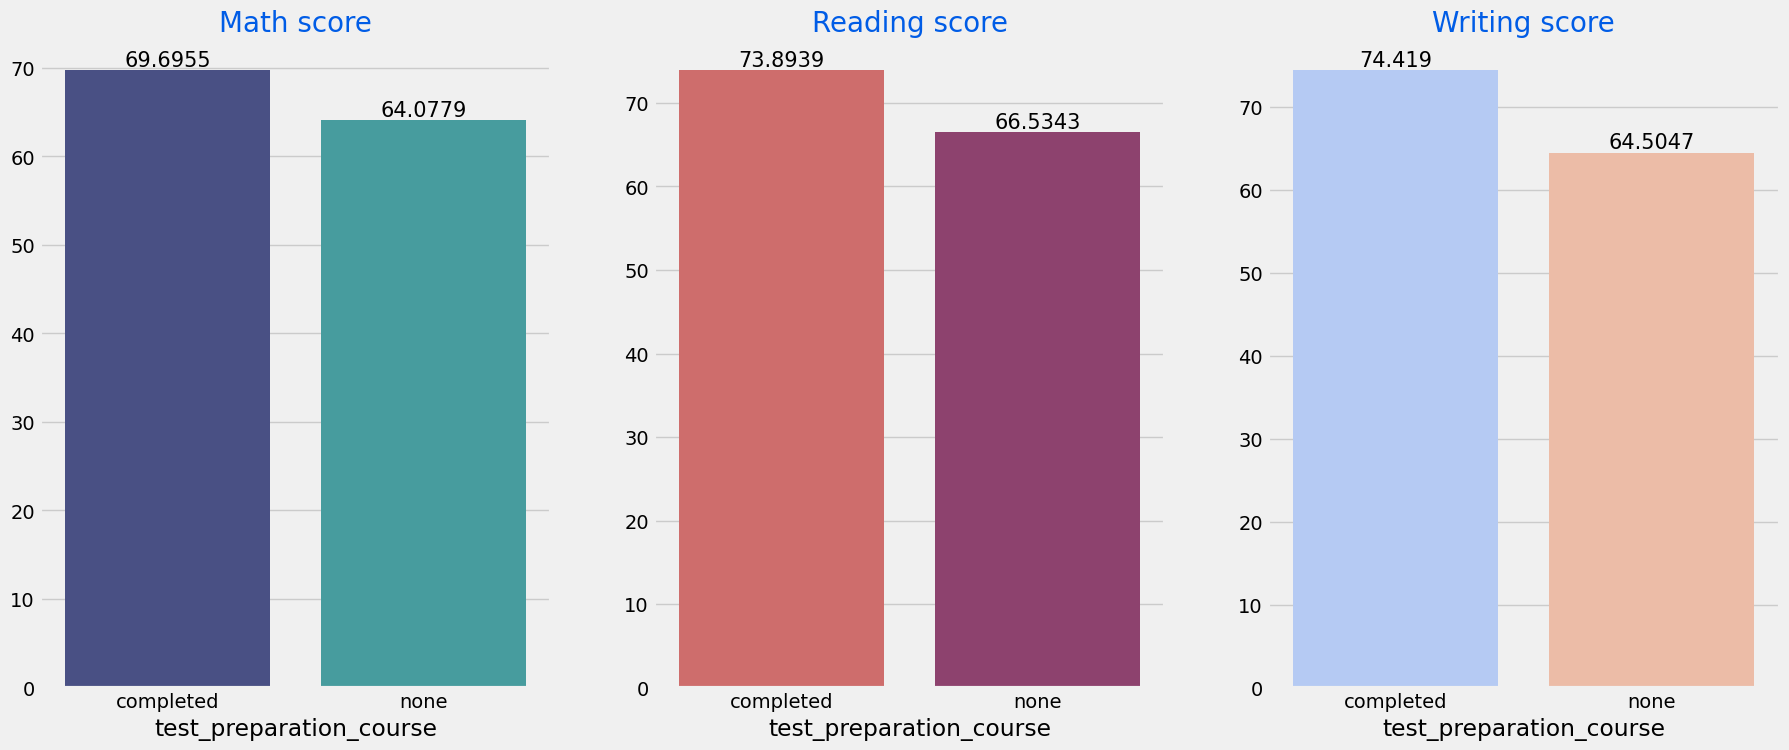

In [99]:
Group_data2=df.groupby('test_preparation_course')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

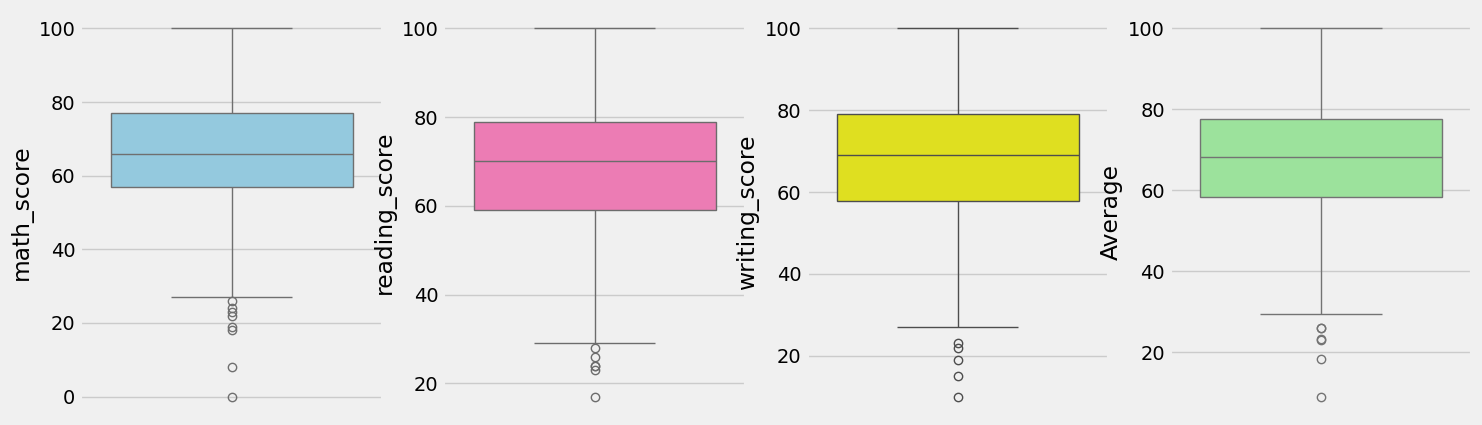

In [100]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()

#### Insights
- Outliers are present in the data

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

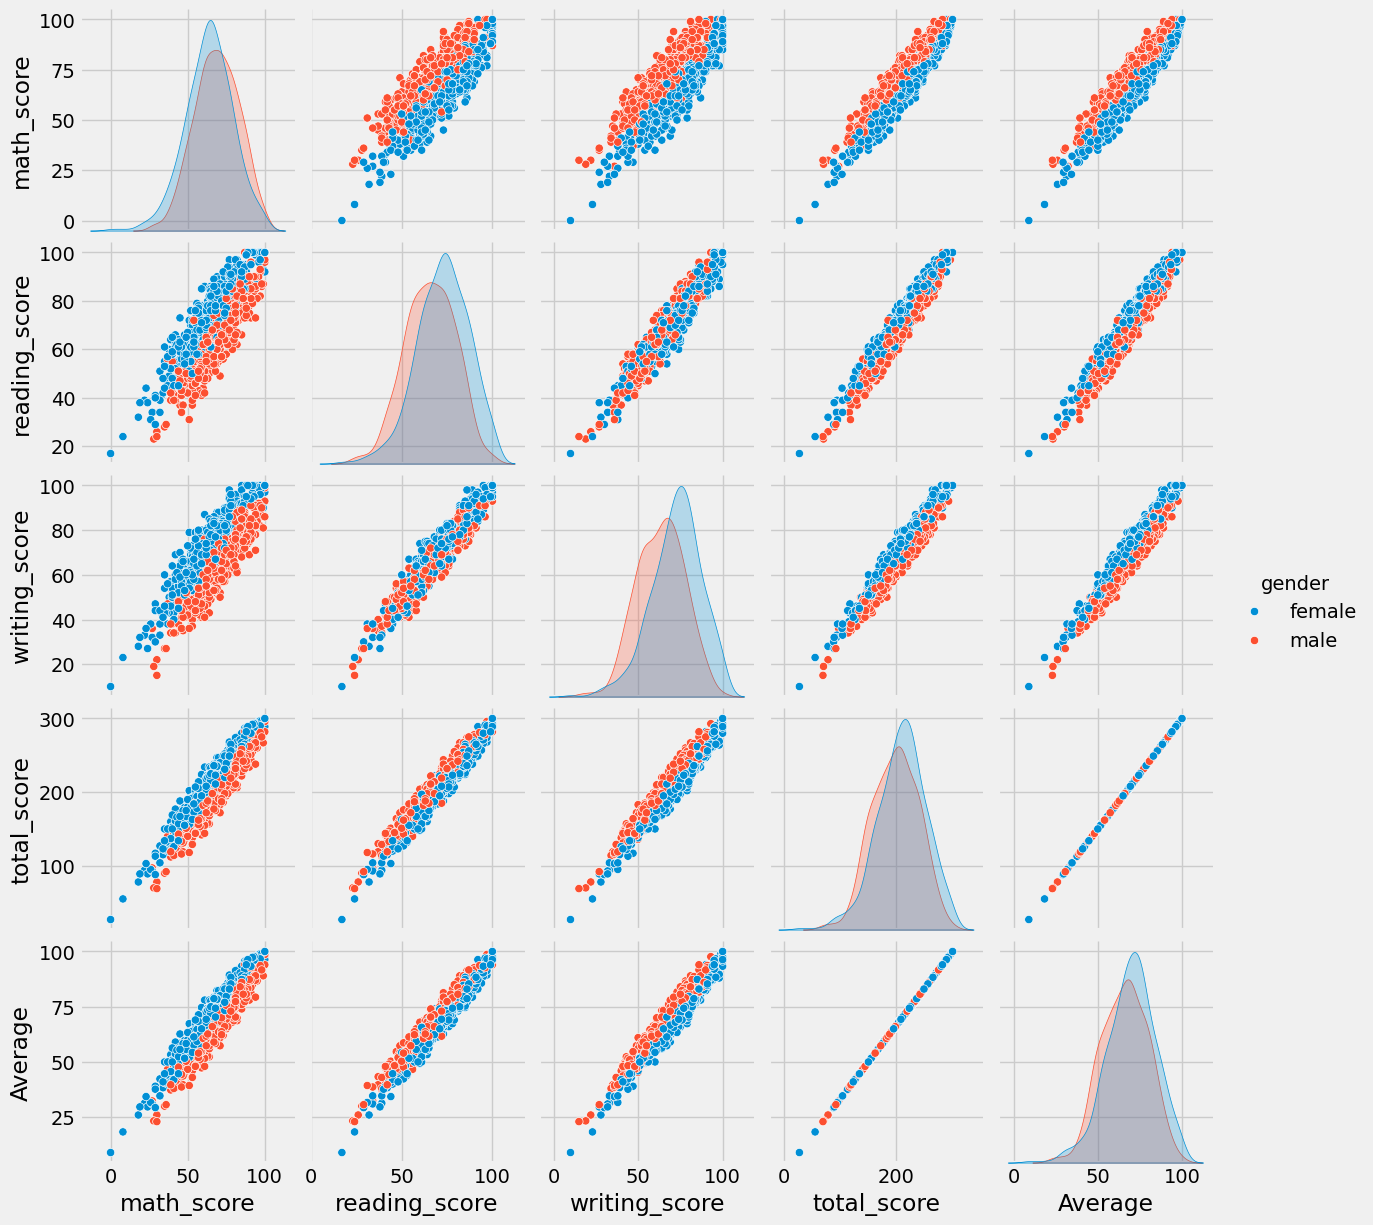

In [101]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.